In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as ms
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

plt.style.use('dark_background')

# `Análisis Visual de datos - Segmentación de clientes de un Banco`

**Grupo _ - Integrantes:**

**Weimar CCapatinta Huamani**

# `1. DEFINICIÓN DEL PROBLEMA`

Para la empresa segmentar a sus clientes qu utilizan sus tarjetas de crédito le permitirá definir canales de comunicación específicos, coherentes y efectivos para cada grupo de usuarios. De esa manera será mucho más sencillo mantener una interacción constante y saludable con los diferentes segmentos,

# `2. DESCRIPCIÓN DEL DATASET`

| `Varaible` | `Descripción de la variable` |
|----------|-------------------------------|
| CUST_ID | Identificación del titular |
| BALANCE | Cantidad de saldo que queda en la cuenta del cliente para hacer compras |
| BALANCE_FREQUENCY | Frecuencia de actualización del saldo 1: actualizado con frecuencia, 0: no actualizado con frecuencia |
| PURCHASES | Cantidad de compras realizadas desde la cuenta |
| ONEOFF_PURCHASES | Importe máximo de compra realizado en una sola vez |
| INSTALLMENTS_PURCHASES | Importe de compra realizada en cuotas |
| CASH_ADVANCE | Anticipo otorgado al usuario |
| PURCHASES_FREQUENCY | Frecuencia con la que se realiza las compras 1: comrpas frecuentes 0: compras no frecuentes|
| ONEOFF_PURCHASES_FREQUENCY | con que frecuencialas compras se realizan de una sola vez 1: confrecuencia 0. no compra con frecuencia|
| PURCHASES_INSTALLMENTS_FREQUENCY | Con que frecuencia se realizan las compras a plazos 1: con frecuencia 0: sin frecuencia|
| CASH_ADVANCE_FREQUENCY | con que frecuencia el gasto se paga por adelantado |
| CASH_ADVANCE_TRX | Numero de transacciones realizadas con efectivo por adelantado |
| PURCHASES_TRX | numero de transacciones de compras realizadas |
| CREDIT_LIMIT | Límite de tarjeta de crédito para el usuario |
| PAYMENTS | Número de pagos realizados por el usuario |
| MINIMUM_PAYMENTS | Cantidad minima de pagos realizados por el usuario |
| PRC_FULL_PAYMENT | porcentje delpago total pagado por el usuario |
| TENURE | Años que el cliente viene usando el servicio de tarjeta de crédito |

In [30]:
data = pd.read_csv('data/data.csv')
print('El dataset cuenta con :\n', data.shape[0],' Filas y \n ',data.shape[1], ' Columnas')
data.head(2)

El dataset cuenta con :
 8950  Filas y 
  18  Columnas


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
1  C10002  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

## `Selección de variables relevantes`

Seleccionamos las siguientes variables:
- CUST_ID: VARIABLE QUE NO APORTA VALOR


In [31]:
Eliminar = 'CUST_ID' # VARIABLE QUE NO APORTA VALOR
#target = 'Loan_Status' # VARIABLE TARGET

Eliminar variables que no aportan información relevante y crear el parametro target = CUST_ID

In [32]:
data.drop(Eliminar,axis=1,inplace=True)

# `3. ANÁLISIS EXPLORATORIO`

Dividimos el Dataset en un dataset de variables numéricas (data_num) y un set de variables categóricas (data_cate)

In [33]:
data_cate = data.select_dtypes('object')
data_num = data.select_dtypes('number')
print('El dataset data_cate cuenta con :\n', data_cate.shape[0],' Filas y \n ',data_cate.shape[1], ' Columnas\n')
print('El dataset data_num cuenta con :\n', data_num.shape[0],' Filas y \n ',data_num.shape[1], ' Columnas')

El dataset data_cate cuenta con :
 8950  Filas y 
  0  Columnas

El dataset data_num cuenta con :
 8950  Filas y 
  17  Columnas


## `3.1 Variables Numericas`

In [34]:
data_num.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Veamos los principales estadísticos:

In [35]:
data_num.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

- la diferencia que exista entre la media (mean) y la mediana (50%) indicara que existe outlayers 
- Existe amplia diferencia entre los clientes que tienen saldos disponible donde el minimo es 0 y el máximo es 19043
- Tambien se puede apreciar la presencia de valores nulos en las variables (CREDIT_LIMIT		MINIMUM_PAYMENTS)

In [36]:
# Vamos a ver quien pago por anticipado $47137!
# hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

data[data['CASH_ADVANCE'] == 47137.211760]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

Ejemplo:
- pago por anticipado $47137
- total transacciones por adelantado 123
- Nunca paga sus compras completamente con la tarjeta

Los tipos de datos se muestran a continuación:

In [37]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### Gráfica de barras y densidad

En las siguientes gráficas se puede apreciar la asimetrtia a la derecha de las variables (ApplicantIncome	CoapplicantIncome	LoanAmount	)

A continuación se grafica las frecuencias y densidad por variable

C:\Users\wmr_w\AppData\Local\Temp\ipykernel_3488\1706269088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "w"})
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_3488\1706269088.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

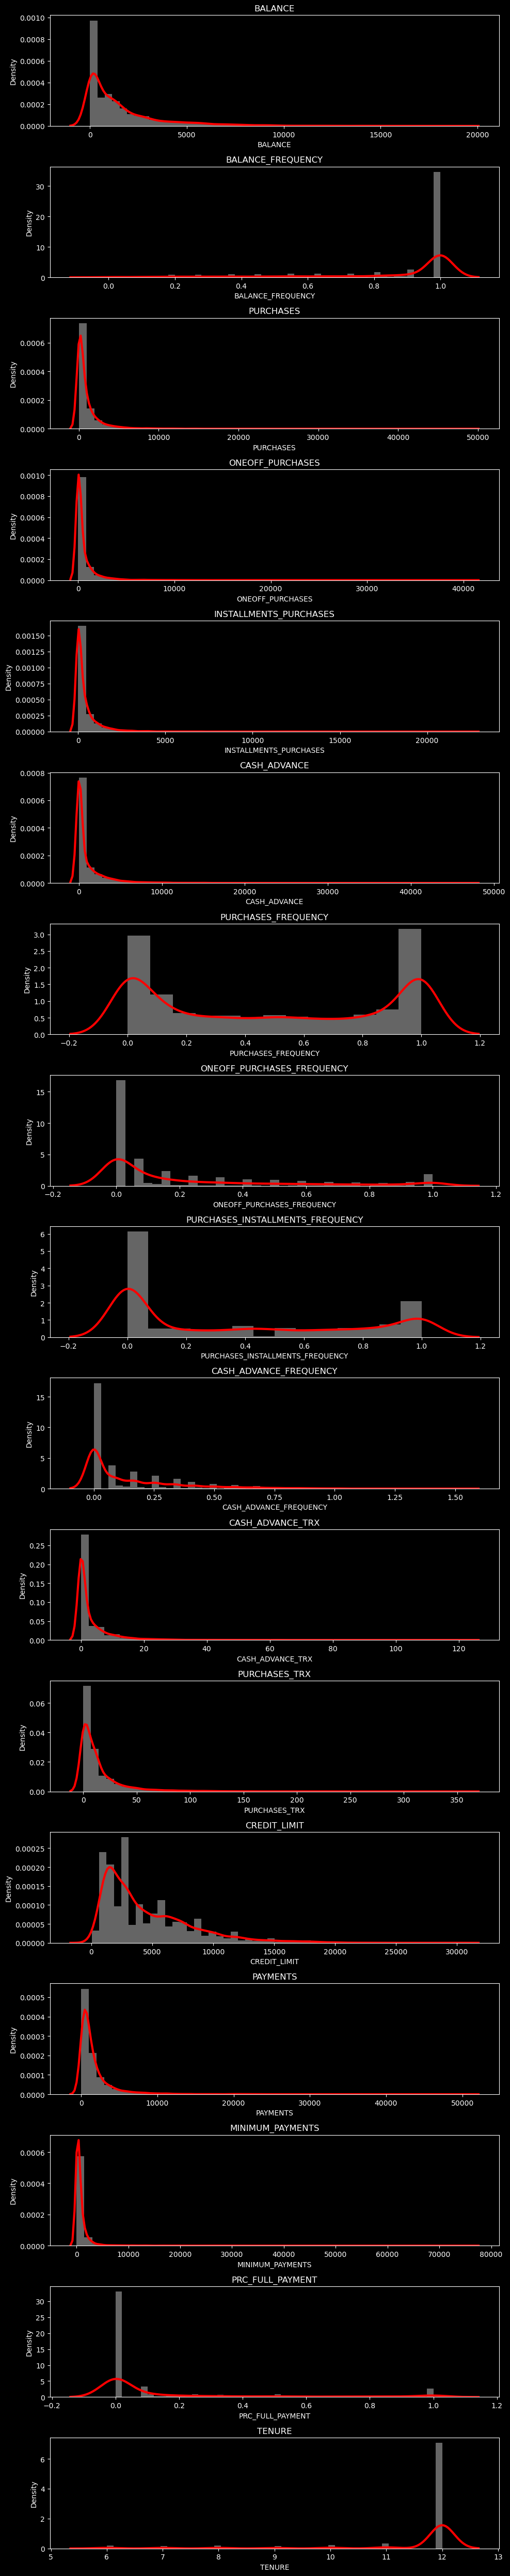

In [38]:
n = len(data_num.columns)

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "w"})
    plt.title(data_num.columns[i])

plt.tight_layout()

In [13]:
# plt.figure(figsize = (10, 50))
# for i in range(len(data_num.columns)):
#     plt.subplot(len(data_num.columns), 1, i+1)
#     sns.distplot(data_num[data_num.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
#     plt.title(data_num.columns[i])

# plt.tight_layout()

### Diagrama de caja

A continuación el diagram de caja por variable y estado de préstamo

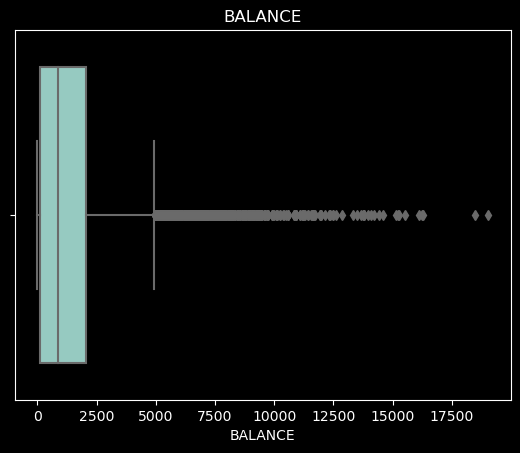

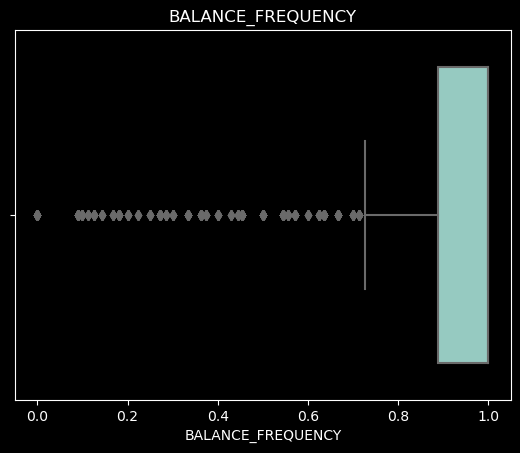

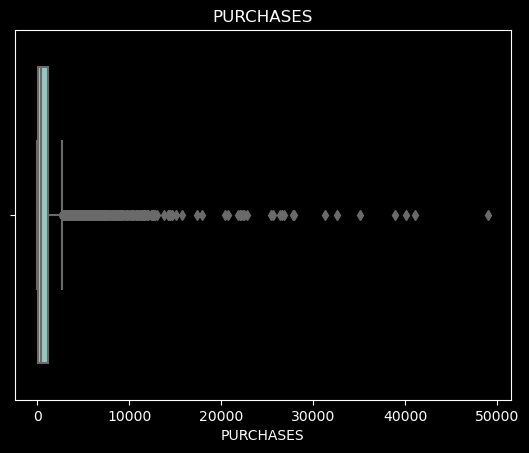

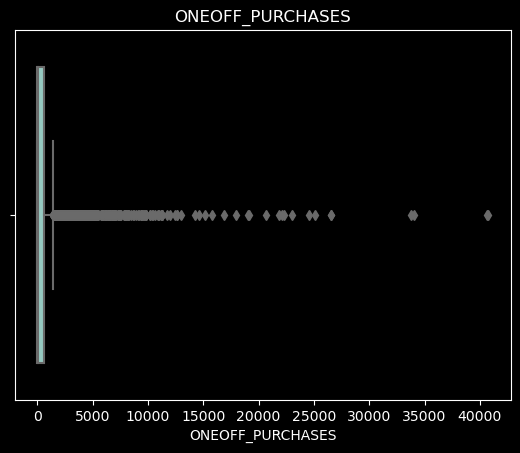

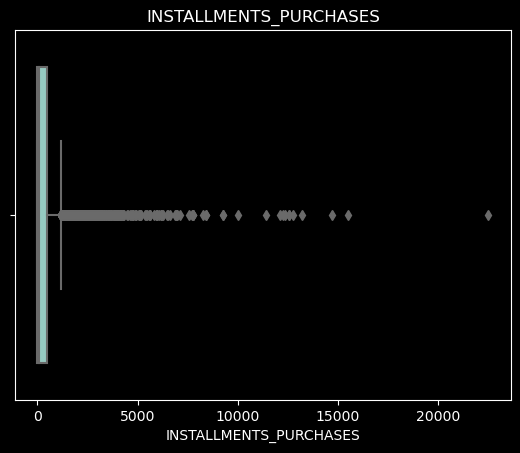

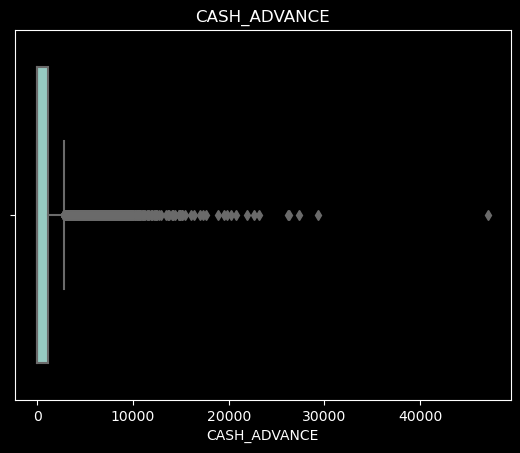

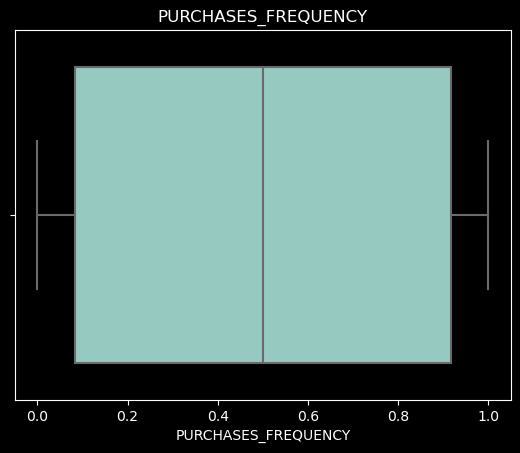

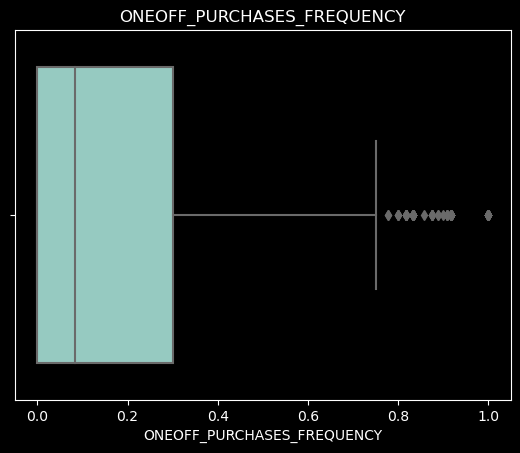

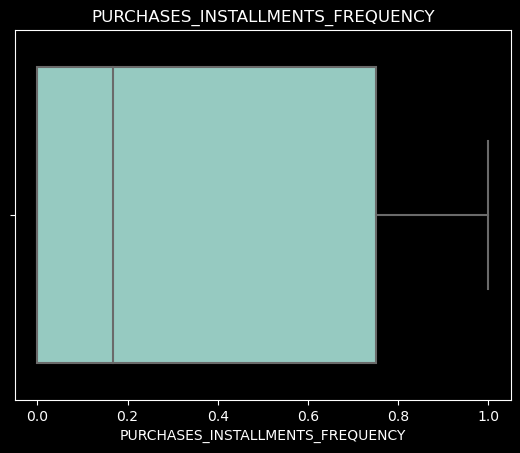

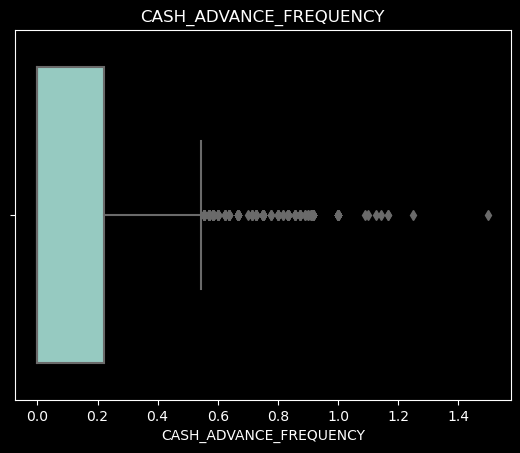

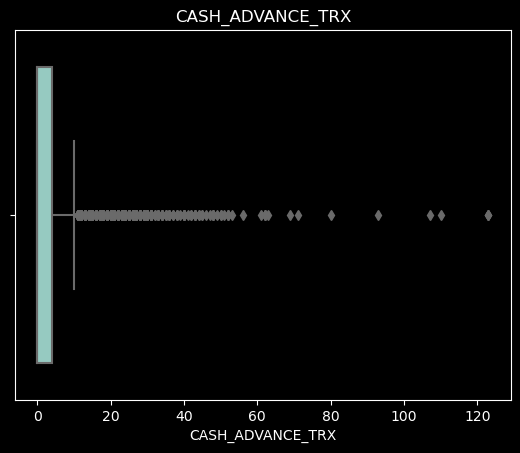

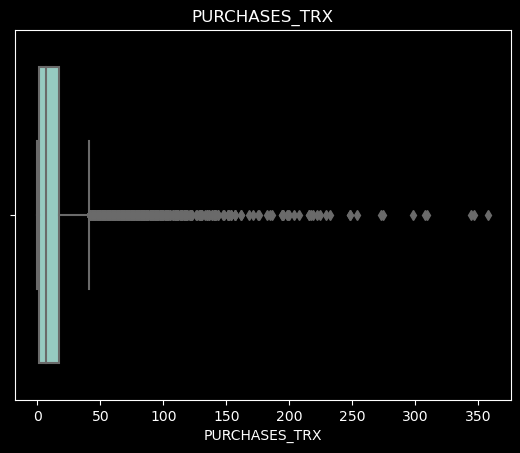

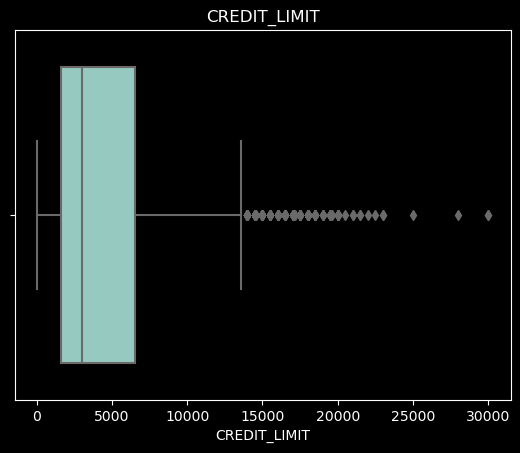

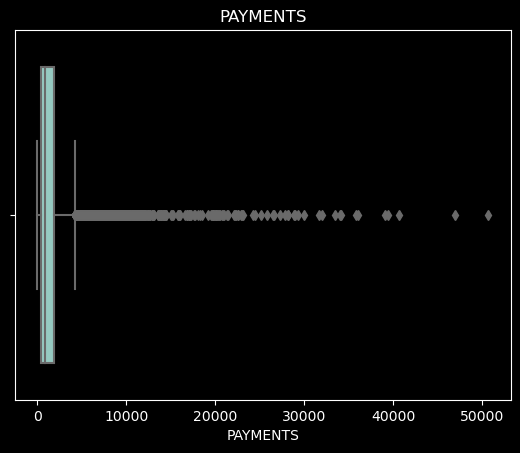

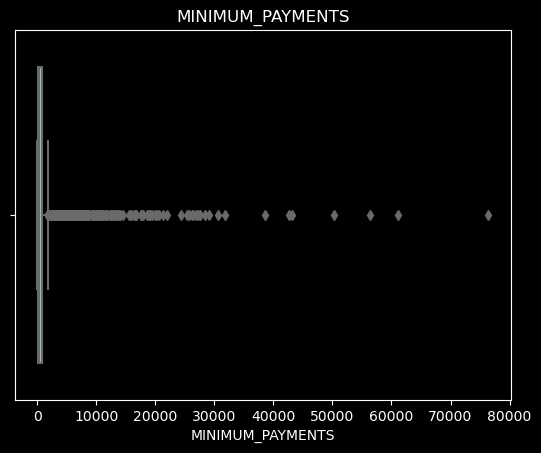

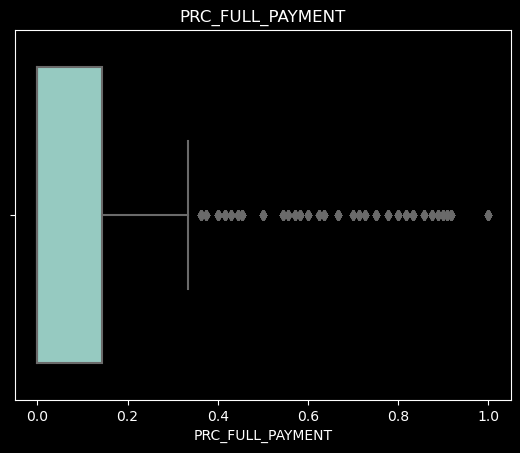

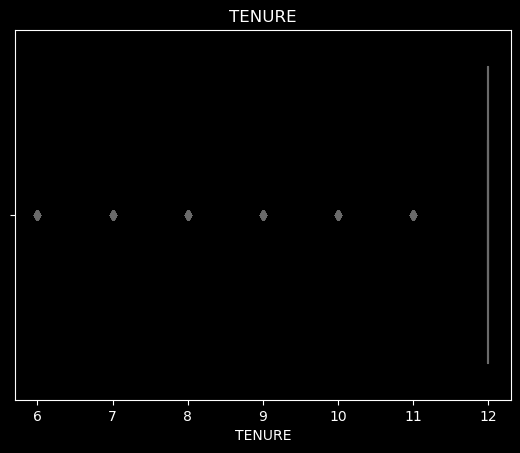

In [39]:
for x in data_num.columns:
  plt.title(data_num[x].name)
  sns.boxplot(x=data_num[x])
  plt.show()

### Valores nulos

Identificamos los valores nulos

In [40]:
data_num.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

De manera visual:

<Axes: >

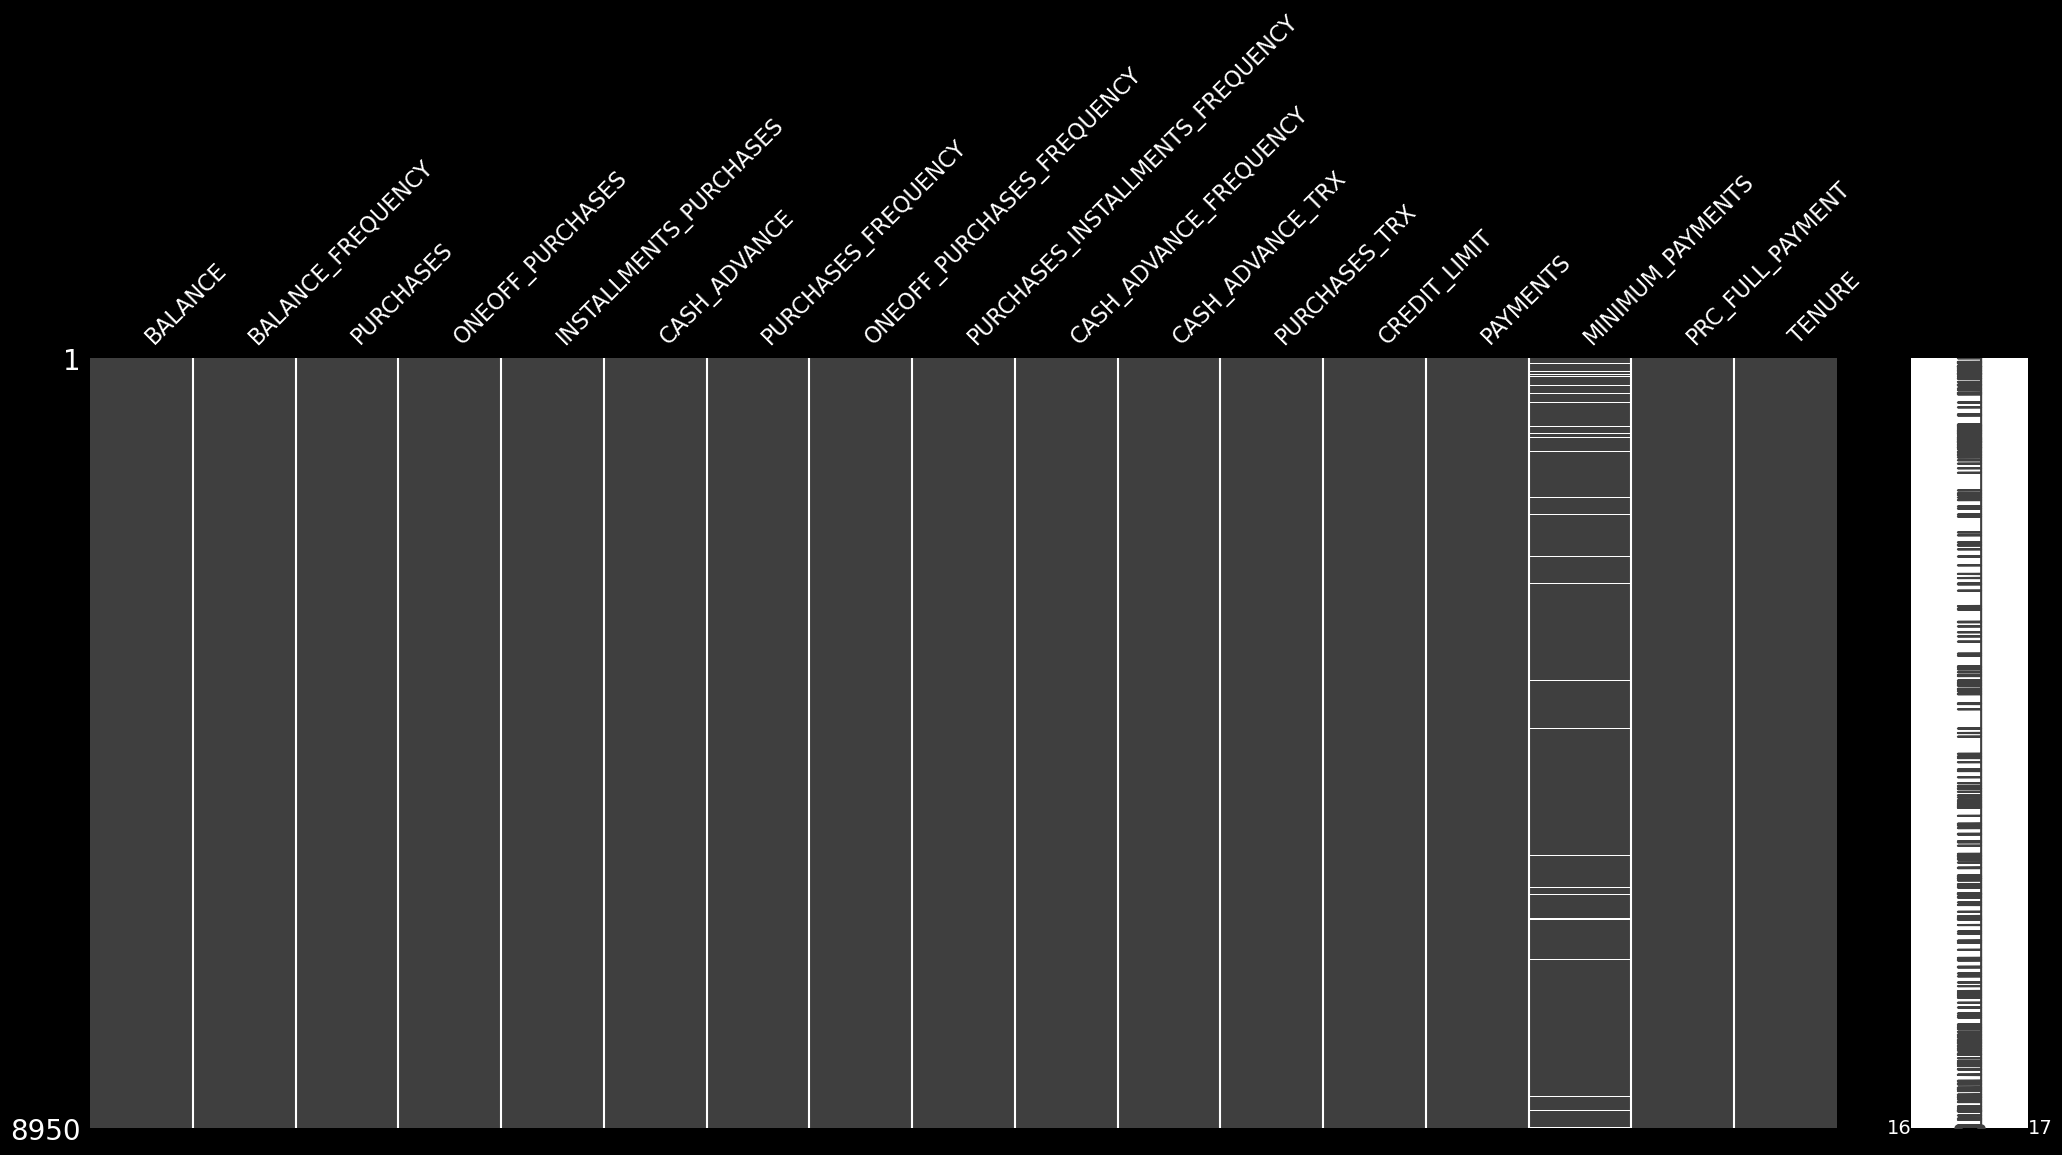

In [41]:
ms.matrix(data_num)

### Imputación

Utilizamos la mediana para la imputación de las variables numéricas

In [42]:
# Imputación de las variables cuantitativas usando la mediana

for i in ('CREDIT_LIMIT','MINIMUM_PAYMENTS'):
  data_num[i].fillna(data_num[i].median(), inplace = True)

In [43]:
data_num.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Estandarización

Estandarizacion de variables numericas.

In [44]:
data_num.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

A:

In [45]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [17]:
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## `3.2 Análisis multivariable`

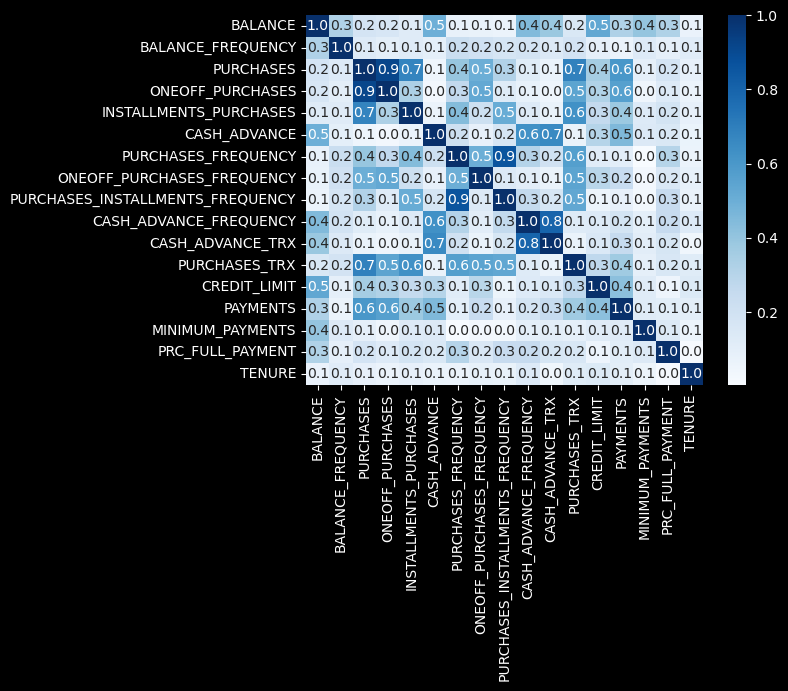

In [46]:
# Analizamos la correlación de las variables. 
sns.heatmap(abs(data.corr()), annot=True, fmt='.1f', cmap='Blues')
plt.show()

Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' también entre  'PURCHASES' y 'ONEOFF_PURCHASES'

Exportamos la data preprocesada.

        data_num.to_csv('Data_procsada.csv', index=False)

In [ ]:
data_num.to_csv('Data_procsada.csv', index=False)

# `4. SEGMENTACIÓN`

In [47]:
type(data_scaled)

numpy.ndarray

In [48]:
pd.DataFrame(data_scaled,columns=data_num.columns)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960378   
8946               -0.675349         -0.476070      -0.350408     -0.960378   
8947               -0.675349         -0.476070      -0.390639     -0.960378   
8948                0.157527         -0.182998      -0.591796     -1.097800   
8949                0.990398         -0.182998       0.333524     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979         -0.302400         -0.525551  0.360680  
1     0.818642          0.097500          0.234227  0.360680  
2    -0.383805         -0.093293         -0.525551  0.360680  
3    -0.598688         -0.228307         -0.525551  0.360680  
4    -0.364368         -0.257266         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217         -0.341250          1.183951 -4.122768  
8946 -0.503396         -0.228307         -0.525551 -4.122768  
8947 -0.570615         -0.326875          0.329200 -

## a. `Método del Codo`

In [49]:
Sum_of_squared_distances = []
silhouette_scores = []
range_values = range(2,15) 
for _ in range_values:
    kmeans = KMeans(n_clusters = _)
    y = kmeans.fit_predict(data_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled,y))

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\clust

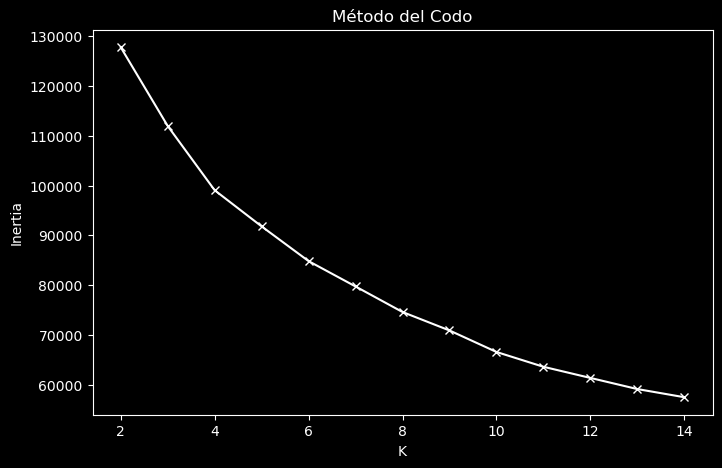

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range_values,Sum_of_squared_distances,'wx-')
plt.title('Método del Codo')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

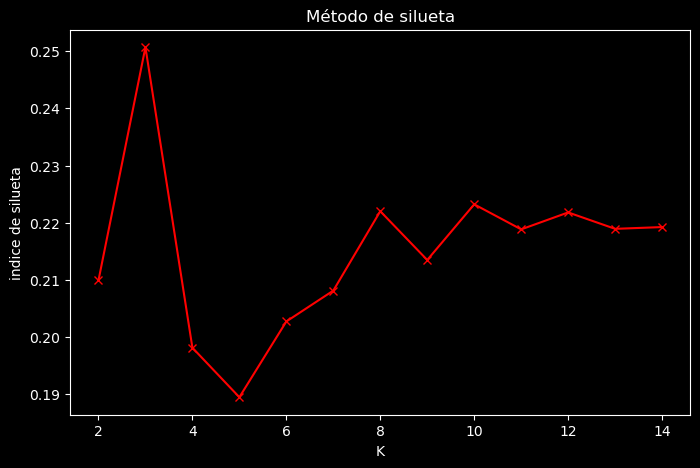

In [52]:
plt.figure(figsize=(8,5))
plt.plot(range_values,silhouette_scores,'rx-')
plt.title('Método de silueta')
plt.xlabel('K')
plt.ylabel('indice de silueta')
plt.show()

Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
Elijamos pues un número de clusters igual a 8.

## b. `KAMEAN`

In [53]:
# extraer los labels
kmeans = KMeans(8)
kmeans.fit(data_scaled)
labels = kmeans.labels_

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


veamo las caraceteristicas de los centroides

In [54]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[data_num.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.336228         -0.347383  -0.287908        -0.214195   
1 -0.701251         -2.141884  -0.310520        -0.235029   
2 -0.361276          0.332243  -0.034937        -0.242478   
3  1.845310          0.340595  12.297201        12.823670   
4  0.010851          0.404058  -0.356958        -0.241856   
5  1.042239          0.465006   2.500780         1.806350   
6 -0.140447          0.399921   0.540145         0.670358   
7  1.687719          0.393158  -0.216794        -0.154773   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.286875     0.067425           -0.201713   
1              -0.302316    -0.322150           -0.555316   
2               0.362677    -0.363522            0.993884   
3               5.516158     0.272530            1.043177   
4              -0.399580    -0.095354           -0.852347   
5               2.594499    -0.161300            1.164798   
6               0.045417    -0.331481            0.978716   
7              -0.228330     2.002962           -0.471460   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.285924                        -0.224146   
1                  -0.442677                        -0.440150   
2                  -0.383892                         1.206422   
3                   2.145028                         0.896761   
4                  -0.394880                        -0.753810   
5                   1.562962                         1.273275   
6                   1.904813                         0.168494   
7                  -0.207431                        -0.411746   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.307084         0.000231     -0.387540    -0.564428   
1              -0.521105        -0.376272     -0.419502    -0.175300   
2              -0.473762        -0.360498      0.189761    -0.260419   
3              -0.380373        -0.109730      4.556136     3.185167   
4               0.102576        -0.028845     -0.481456    -0.304026   
5              -0.284847        -0.150801      3.128411     1.303242   
6              -0.413621        -0.330187      0.617510     0.424718   
7               1.906367         1.912616     -0.266321     1.031466   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.392784        -0.215984         0.014243 -3.202809  
1 -0.202111        -0.284665         0.281920  0.198841  
2 -0.214816        -0.023449         0.313605  0.256155  
3  9.047799         1.038198         1.222264  0.298409  
4 -0.250601        -0.008380        -0.455335  0.274031  
5  1.436890         0.566094         0.251719  0.337526  
6  0.143528        -0.154526         0.447649  0.268773  
7  0.818461         0.557420        -0.390719  0.070133

In [55]:
cluster_centers_plot = cluster_centers.T.reset_index()

In [56]:
cluster_centers_plot

level_0         0         1         2          3  \
0                            BALANCE -0.336228 -0.701251 -0.361276   1.845310   
1                  BALANCE_FREQUENCY -0.347383 -2.141884  0.332243   0.340595   
2                          PURCHASES -0.287908 -0.310520 -0.034937  12.297201   
3                   ONEOFF_PURCHASES -0.214195 -0.235029 -0.242478  12.823670   
4             INSTALLMENTS_PURCHASES -0.286875 -0.302316  0.362677   5.516158   
5                       CASH_ADVANCE  0.067425 -0.322150 -0.363522   0.272530   
6                PURCHASES_FREQUENCY -0.201713 -0.555316  0.993884   1.043177   
7         ONEOFF_PURCHASES_FREQUENCY -0.285924 -0.442677 -0.383892   2.145028   
8   PURCHASES_INSTALLMENTS_FREQUENCY -0.224146 -0.440150  1.206422   0.896761   
9             CASH_ADVANCE_FREQUENCY  0.307084 -0.521105 -0.473762  -0.380373   
10                  CASH_ADVANCE_TRX  0.000231 -0.376272 -0.360498  -0.109730   
11                     PURCHASES_TRX -0.387540 -0.419502  0.189761   4.556136   
12                      CREDIT_LIMIT -0.564428 -0.175300 -0.260419   3.185167   
13                          PAYMENTS -0.392784 -0.202111 -0.214816   9.047799   
14                  MINIMUM_PAYMENTS -0.215984 -0.284665 -0.023449   1.038198   
15                  PRC_FULL_PAYMENT  0.014243  0.281920  0.313605   1.222264   
16                            TENURE -3.202809  0.198841  0.256155   0.298409   

           4         5         6         7  
0   0.010851  1.042239 -0.140447  1.687719  
1   0.404058  0.465006  0.399921  0.393158  
2  -0.356958  2.500780  0.540145 -0.216794  
3  -0.241856  1.806350  0.670358 -0.154773  
4  -0.399580  2.594499  0.045417 -0.228330  
5  -0.095354 -0.161300 -0.331481  2.002962  
6  -0.852347  1.164798  0.978716 -0.471460  
7  -0.394880  1.562962  1.904813 -0.207431  
8  -0.753810  1.273275  0.168494 -0.411746  
9   0.102576 -0.284847 -0.413621  1.906367  
10 -0.028845 -0.150801 -0.330187  1.912616  
11 -0.481456  3.128411  0.617510 -0.266321  
12 -0.304026  1.303242  0.424718  1.031466  
13 -0.250601  1.436890  0.143528  0.818461  
14 -0.008380  0.566094 -0.154526  0.557420  
15 -0.455335  0.251719  0.447649 -0.390719  
16  0.274031  0.337526  0.268773  0.070133

In [57]:
cluster_centers_plot[2:6].columns

Index(['level_0', 0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

In [58]:
import plotly.express as px
import pandas as pd

In [60]:
for i in range(0,8):
    fig = px.line_polar(cluster_centers_plot, r = i, theta ='level_0', line_close = True
    , title = 'Cluster ' + str(i), template="plotly_dark")
    fig.update_traces(fill = 'toself')

    fig.show()

c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



 transformación inversa de lso centroides

In [61]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[data_num.columns])
cluster_centers.T

0            1            2  \
BALANCE                            864.645308   104.879787   812.508369   
BALANCE_FREQUENCY                    0.794979     0.369878     0.955976   
PURCHASES                          388.085586   339.774078   928.562460   
ONEOFF_PURCHASES                   236.917416   202.337758   189.973229   
INSTALLMENTS_PURCHASES             151.649711   137.687420   739.032326   
CASH_ADVANCE                      1120.263874   303.307732   216.548132   
PURCHASES_FREQUENCY                  0.409393     0.267475     0.889244   
ONEOFF_PURCHASES_FREQUENCY           0.117161     0.070399     0.087935   
PURCHASES_INSTALLMENTS_FREQUENCY     0.275356     0.189510     0.843900   
CASH_ADVANCE_FREQUENCY               0.196595     0.030866     0.040340   
CASH_ADVANCE_TRX                     3.250401     0.681049     0.788690   
PURCHASES_TRX                        5.077047     4.282572    19.426587   
CREDIT_LIMIT                      2440.642055  3856.463151  3546.761013   
PAYMENTS                           596.072587  1148.051951  1111.271774   
MINIMUM_PAYMENTS                   341.089329   180.878855   790.207735   
PRC_FULL_PAYMENT                     0.157880     0.236172     0.245439   
TENURE                               7.231140    11.783418    11.860119   

                                             3            4            5  \
BALANCE                            5405.330935  1587.060727  3733.806745   
BALANCE_FREQUENCY                     0.957955     0.972988     0.987426   
PURCHASES                         27276.363750   240.559124  6346.159662   
ONEOFF_PURCHASES                  21877.102917   191.006510  3590.608789   
INSTALLMENTS_PURCHASES             5399.260833    49.732505  2757.241014   
CASH_ADVANCE                       1550.378389   778.909334   640.617891   
PURCHASES_FREQUENCY                   0.909028     0.148262     0.957840   
ONEOFF_PURCHASES_FREQUENCY            0.842361     0.084657     0.668720   
PURCHASES_INSTALLMENTS_FREQUENCY      0.720833     0.064854     0.870470   
CASH_ADVANCE_FREQUENCY                0.059028     0.155671     0.078143   
CASH_ADVANCE_TRX                      2.500000     3.051981     2.219718   
PURCHASES_TRX                       127.958333     2.742639    92.470423   
CREDIT_LIMIT                      16083.333333  3388.101296  9236.056338   
PAYMENTS                          27925.634496  1007.678469  5892.801050   
MINIMUM_PAYMENTS                   3266.671038   825.359452  2165.411857   
PRC_FULL_PAYMENT                      0.511206     0.020537     0.227338   
TENURE                               11.916667    11.884042    11.969014   

                                            6            7  
BALANCE                           1272.146430  5077.319508  
BALANCE_FREQUENCY                    0.972008     0.970406  
PURCHASES                         2157.231979   540.021916  
ONEOFF_PURCHASES                  1705.094492   335.546340  
INSTALLMENTS_PURCHASES             452.137487   204.591505  
CASH_ADVANCE                       283.739175  5179.176652  
PURCHASES_FREQUENCY                  0.883156     0.301131  
ONEOFF_PURCHASES_FREQUENCY           0.770700     0.140577  
PURCHASES_INSTALLMENTS_FREQUENCY     0.431401     0.200799  
CASH_ADVANCE_FREQUENCY               0.052374     0.516628  
CASH_ADVANCE_TRX                     0.995544    16.301026  
PURCHASES_TRX                       30.058824     8.090080  
CREDIT_LIMIT                      6039.596500  8247.211568  
PAYMENTS                          2148.644318  4102.509644  
MINIMUM_PAYMENTS                   484.449602  2145.178663  
PRC_FULL_PAYMENT                     0.284644     0.039436  
TENURE                              11.877005    11.611174

In [62]:
data_num_cluster = pd.concat([data_num, pd.DataFrame({'cluster': labels})], axis=1)
data_num_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        7  
2   622.066742        627.284787          0.000000      12        6  
3     0.000000        312.343947          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4

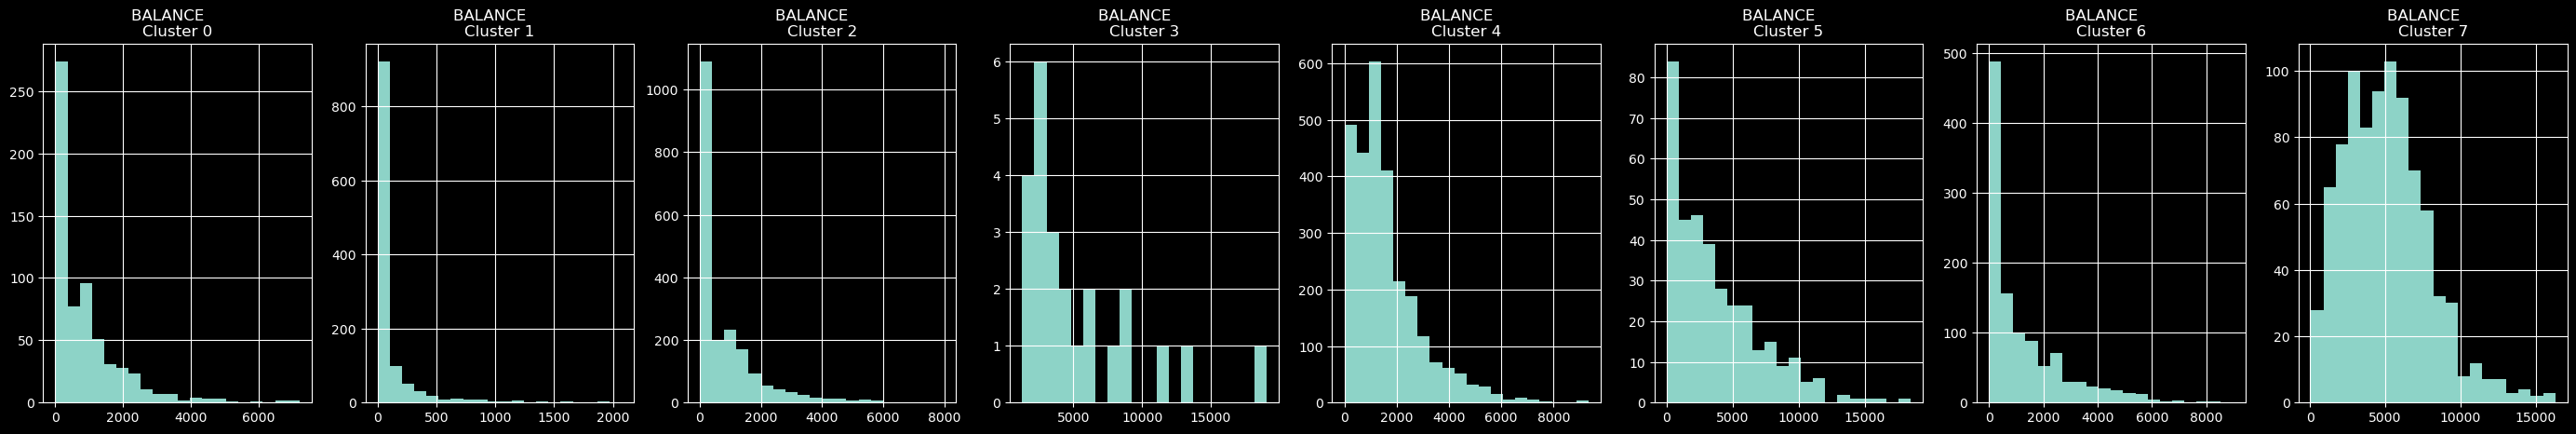

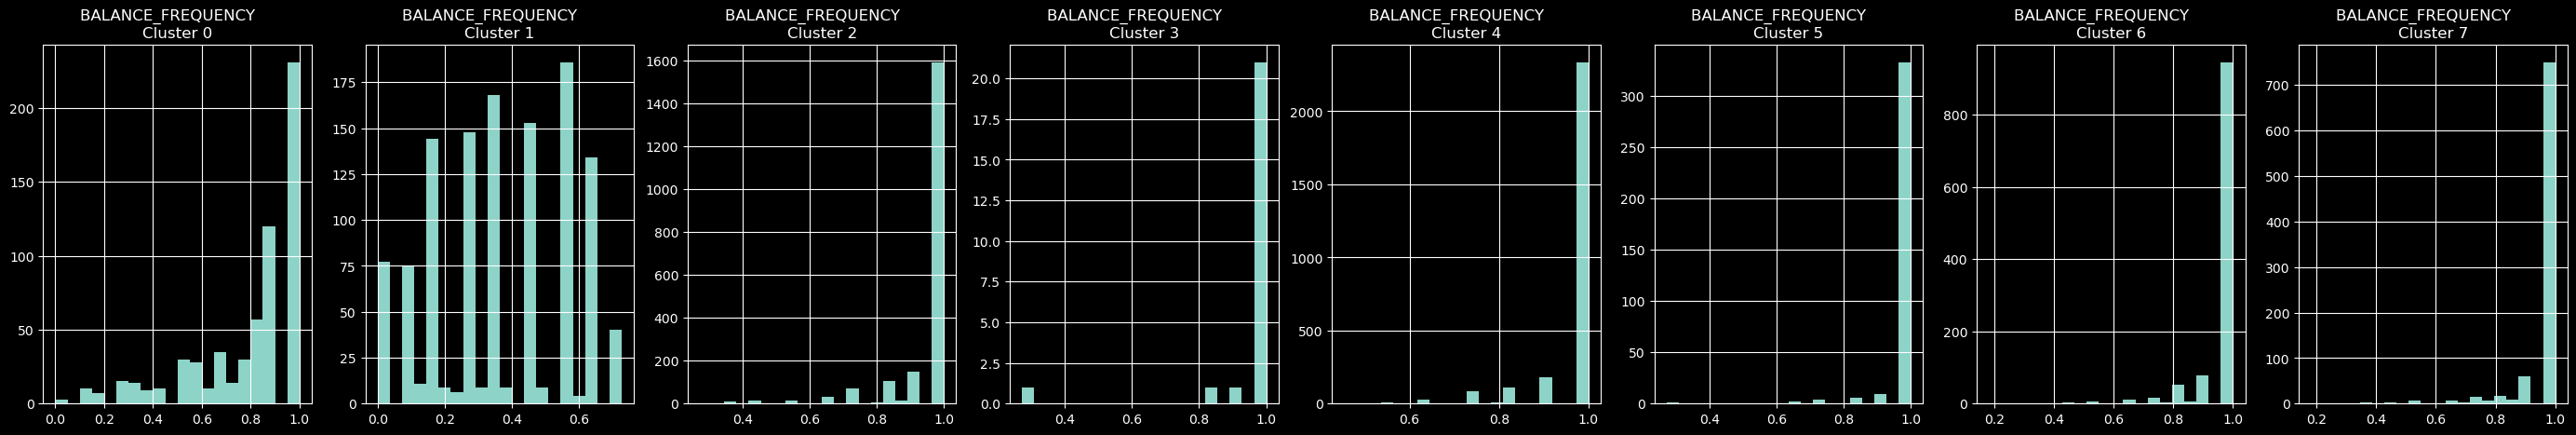

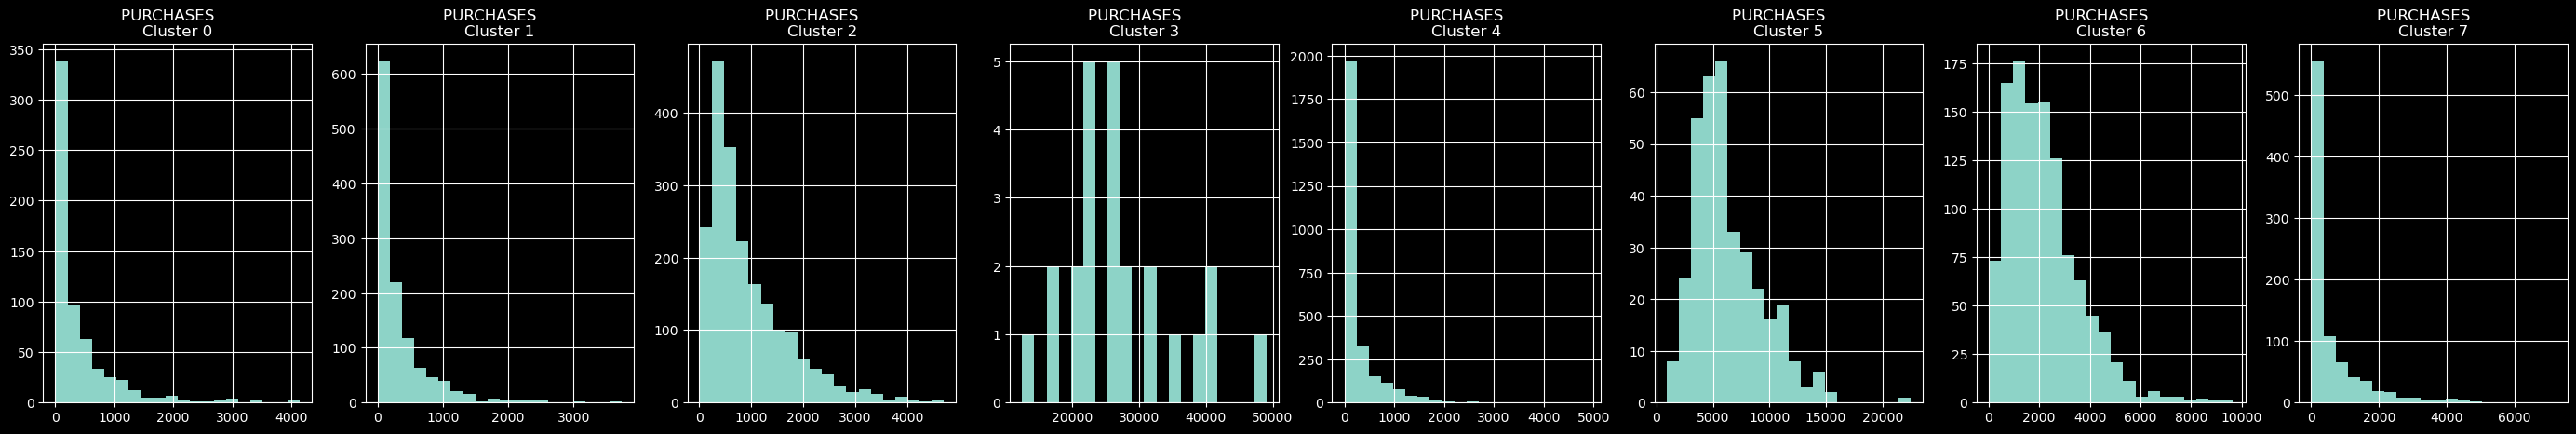

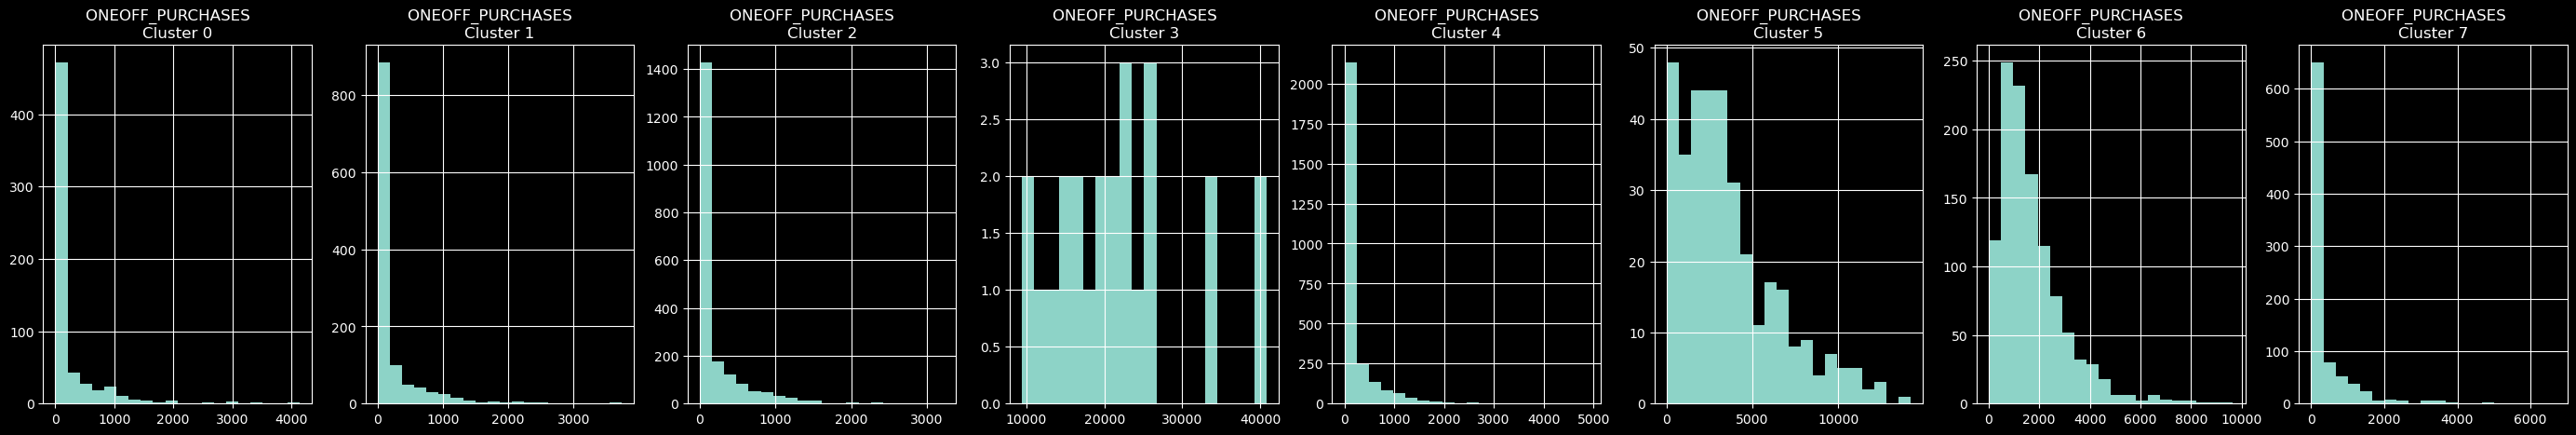

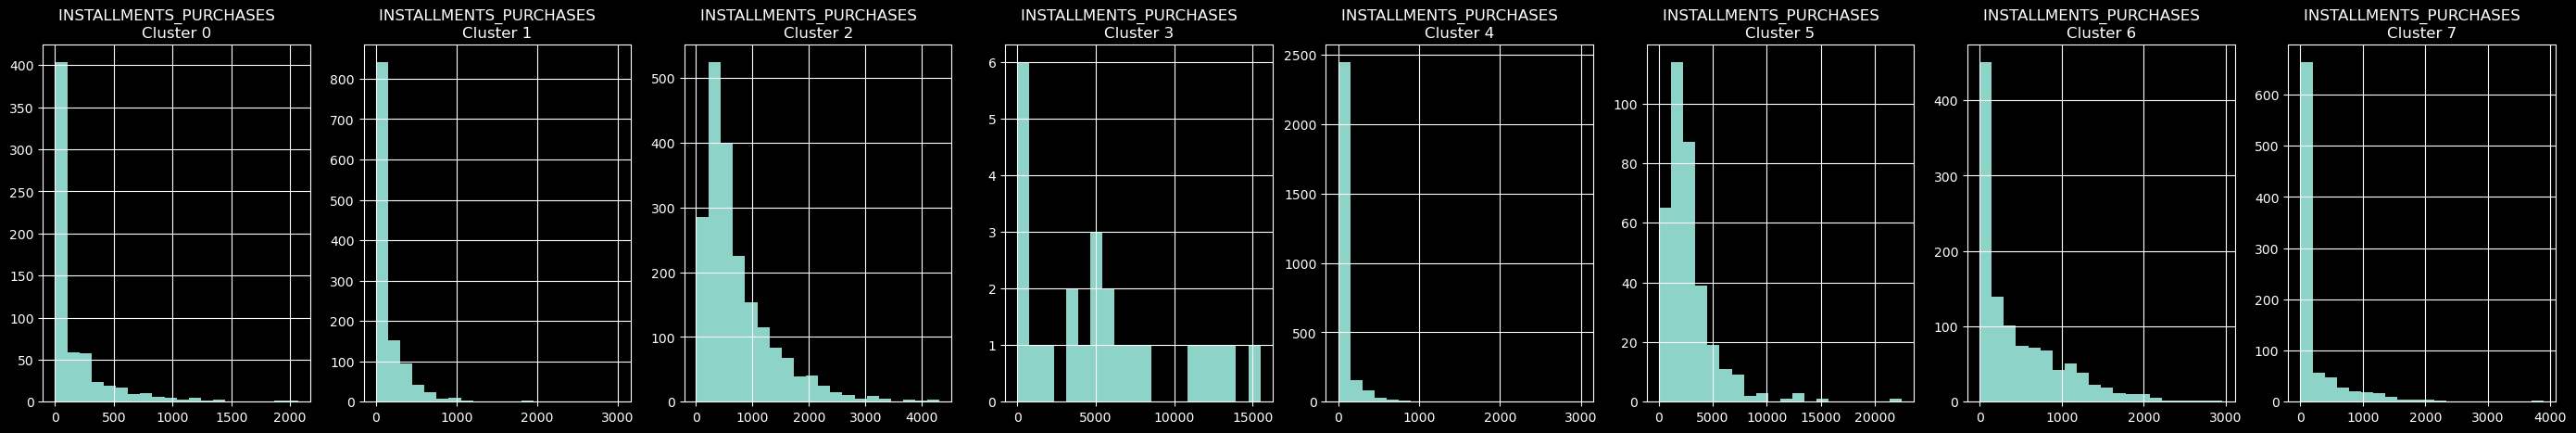

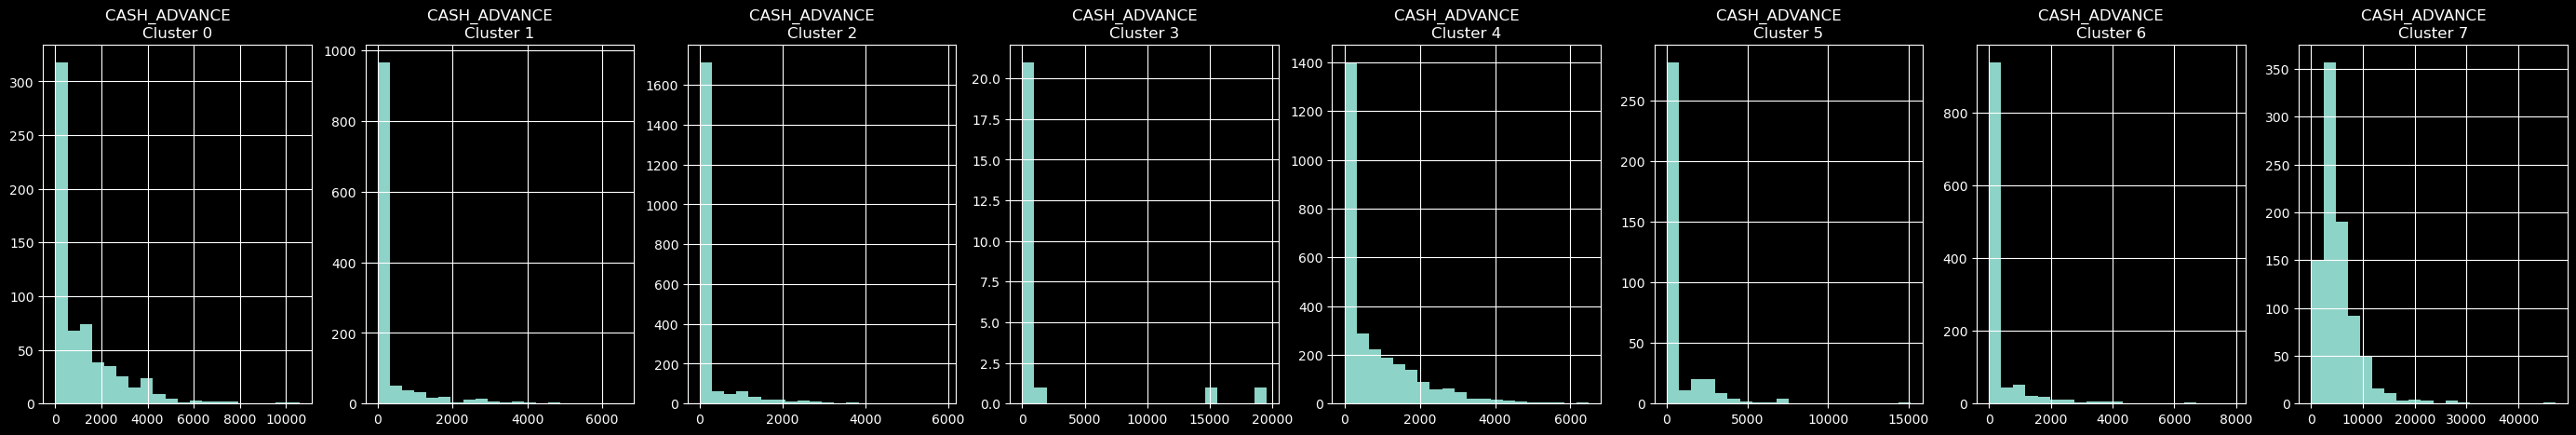

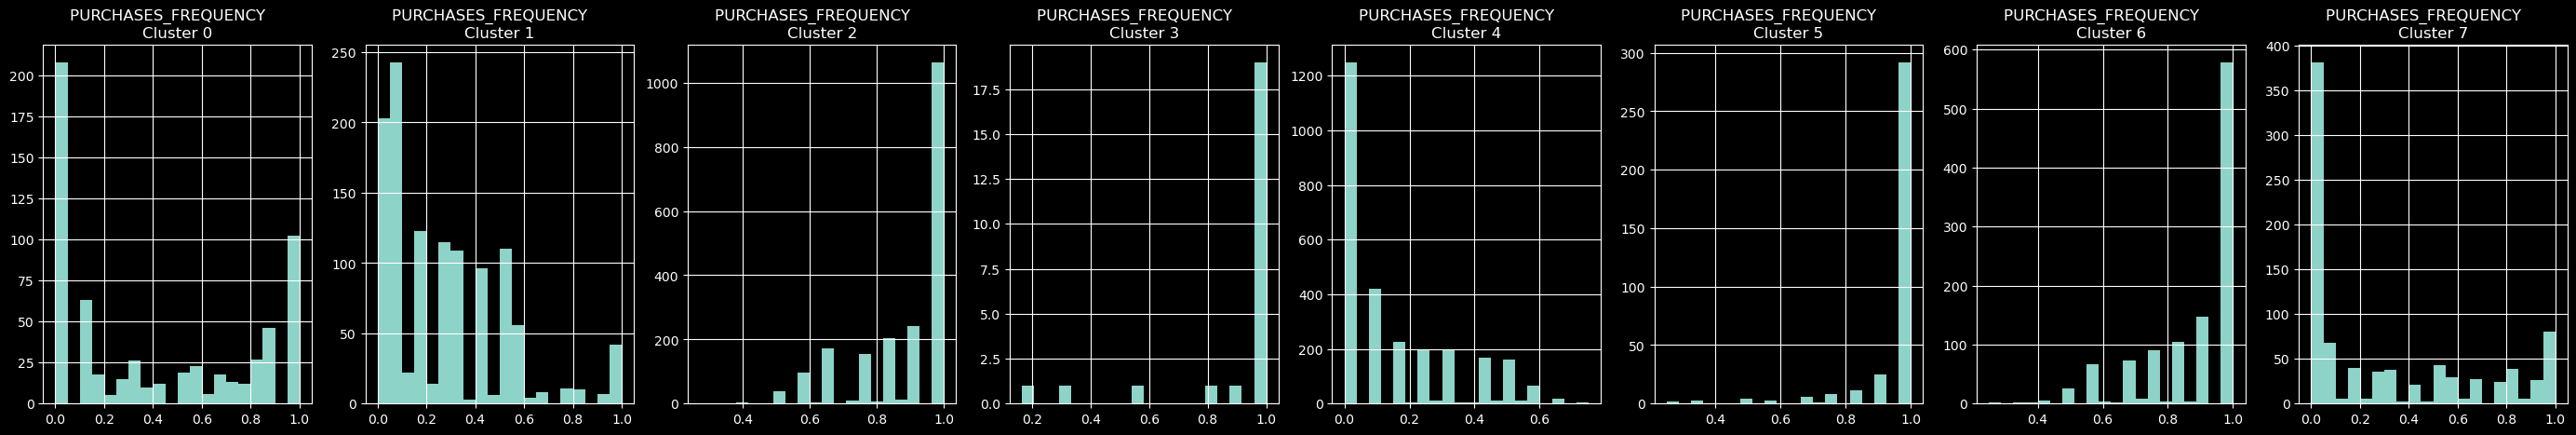

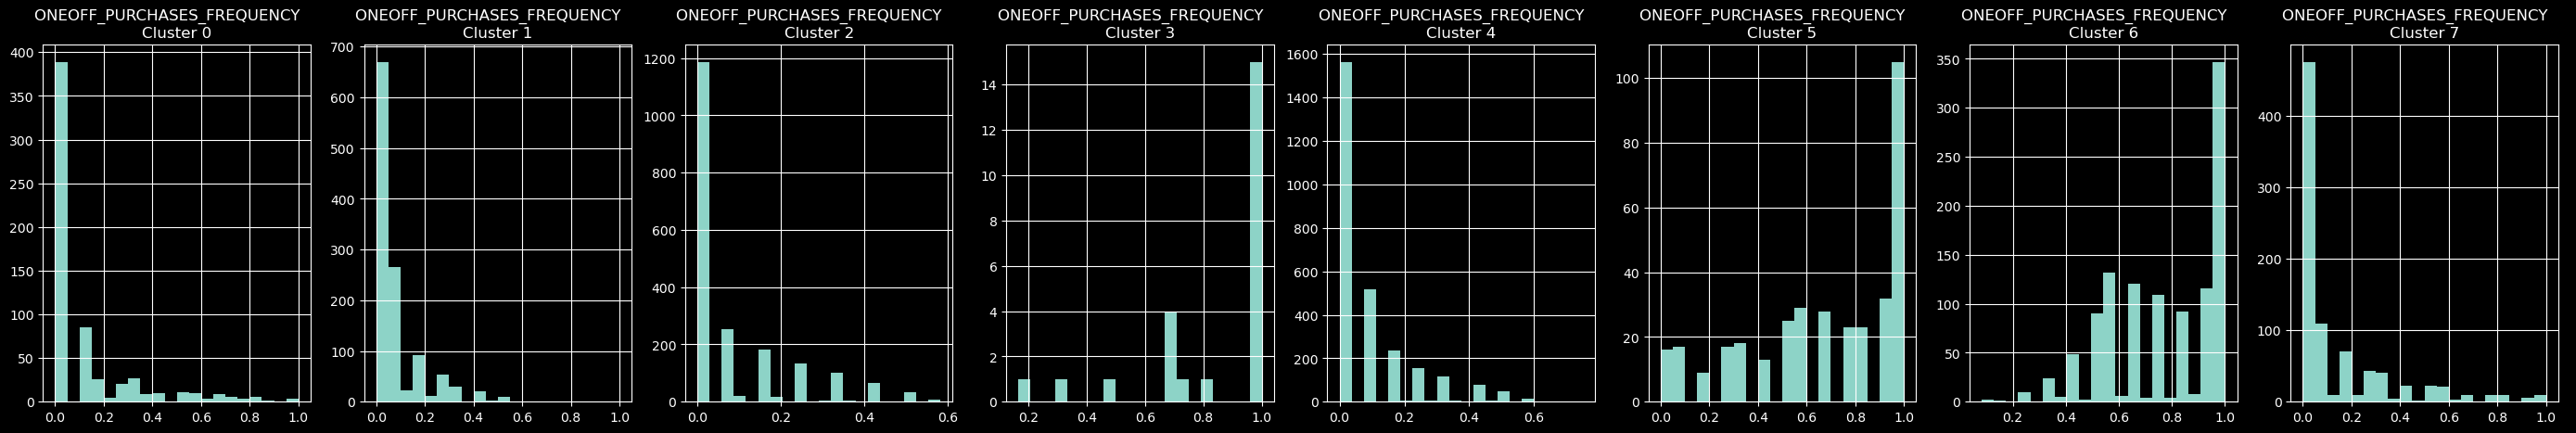

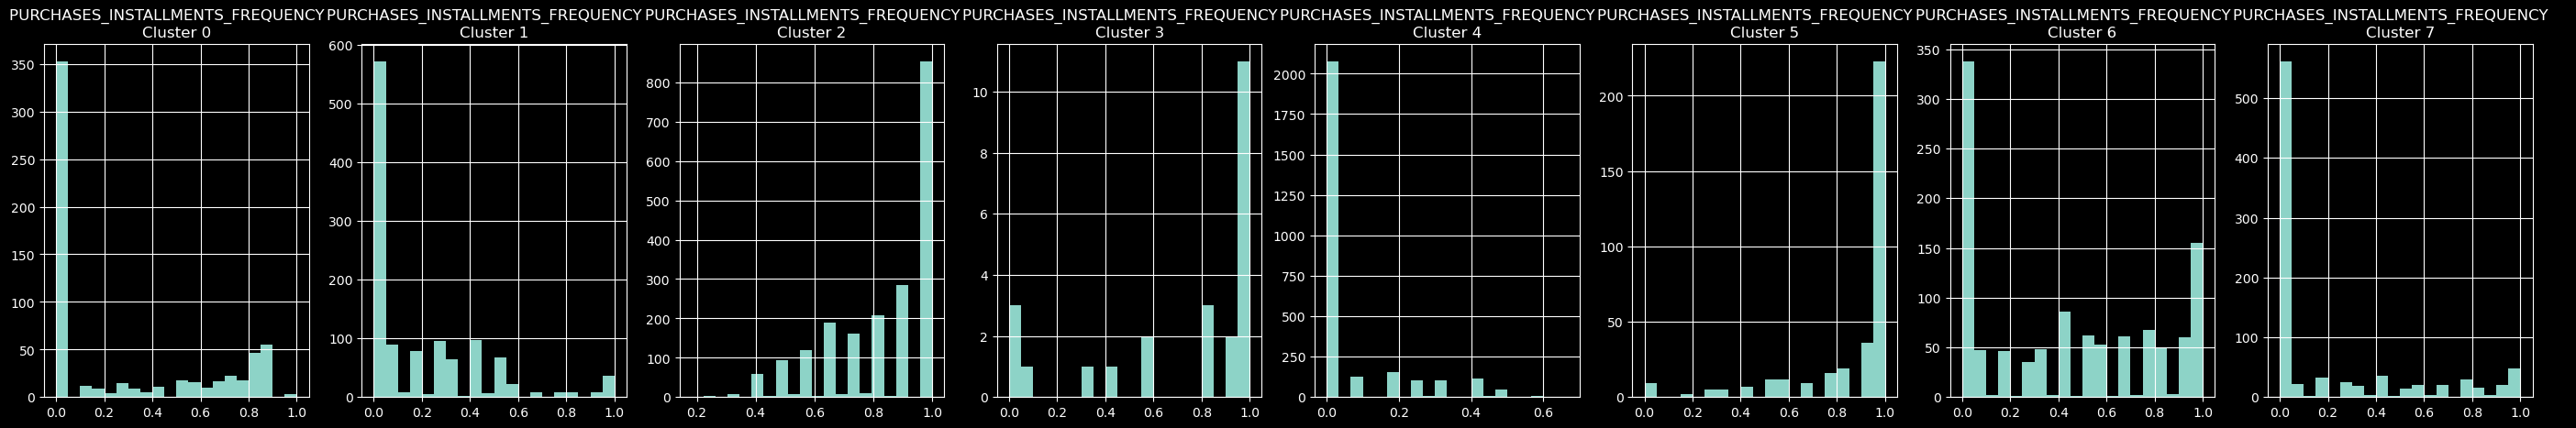

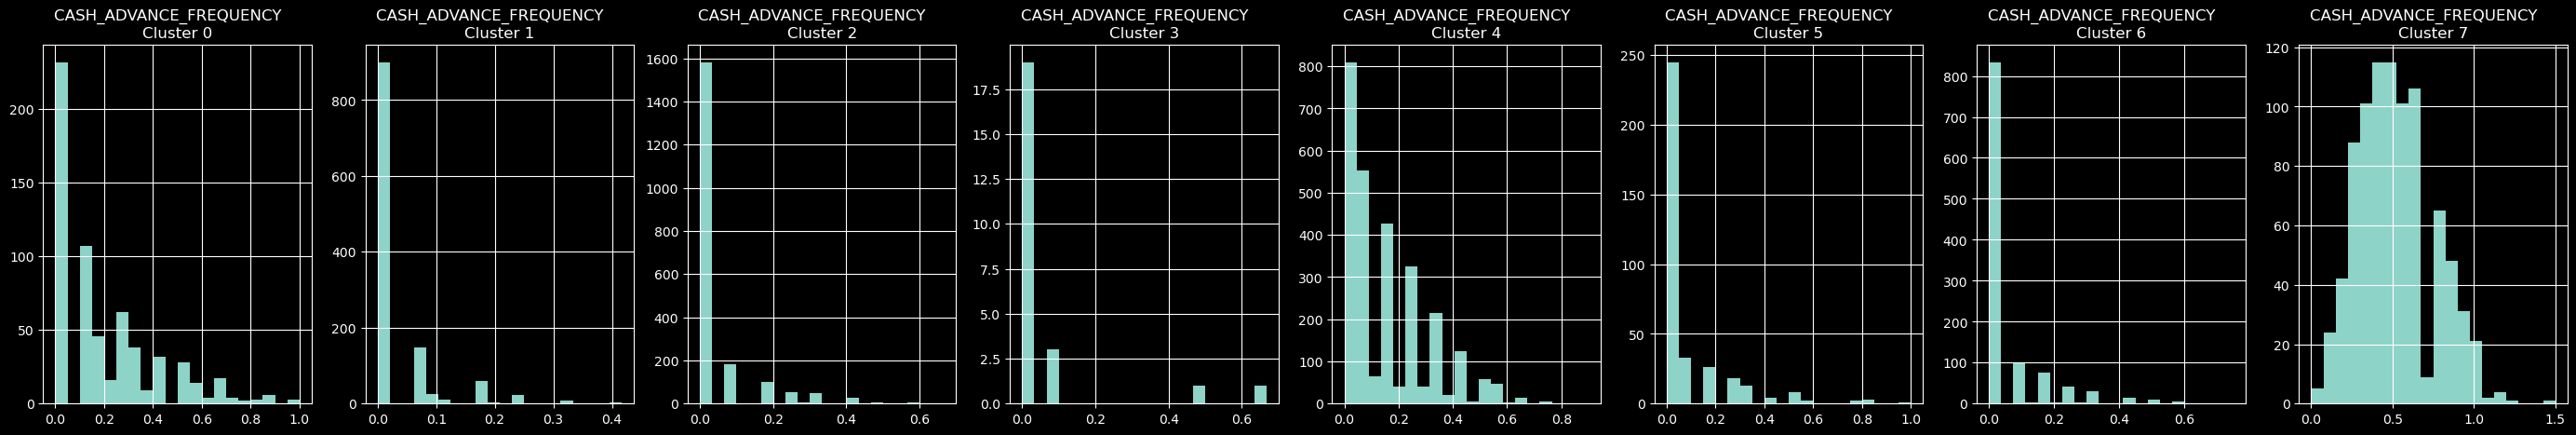

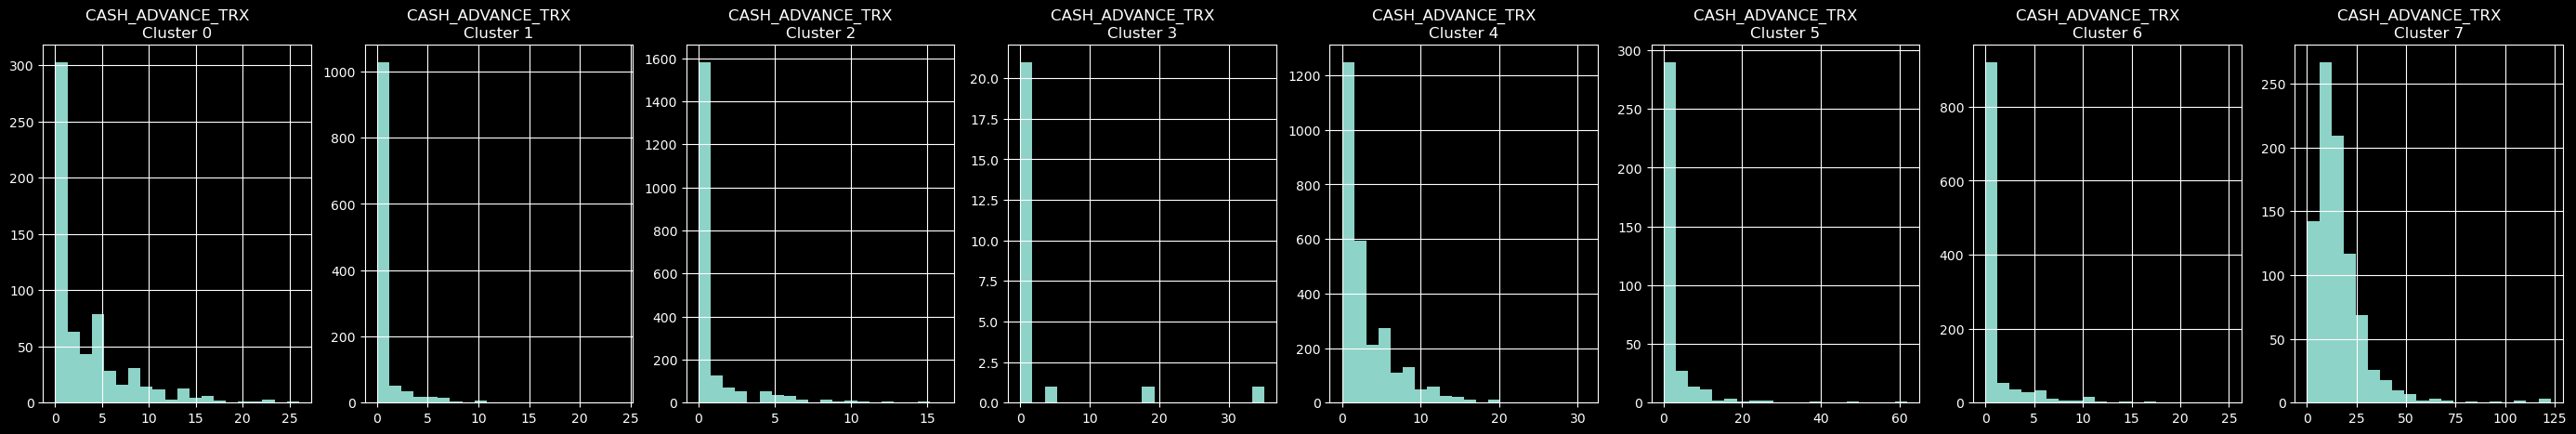

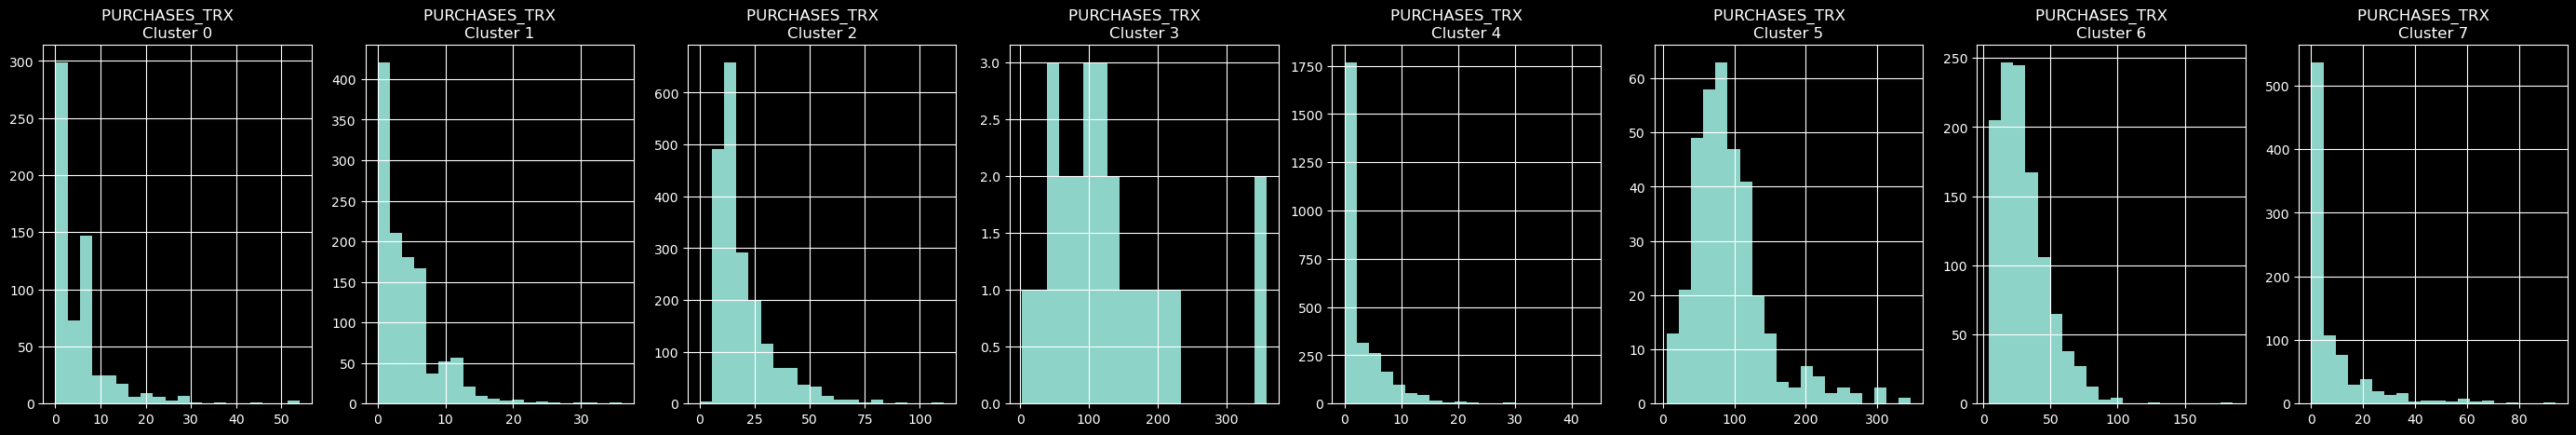

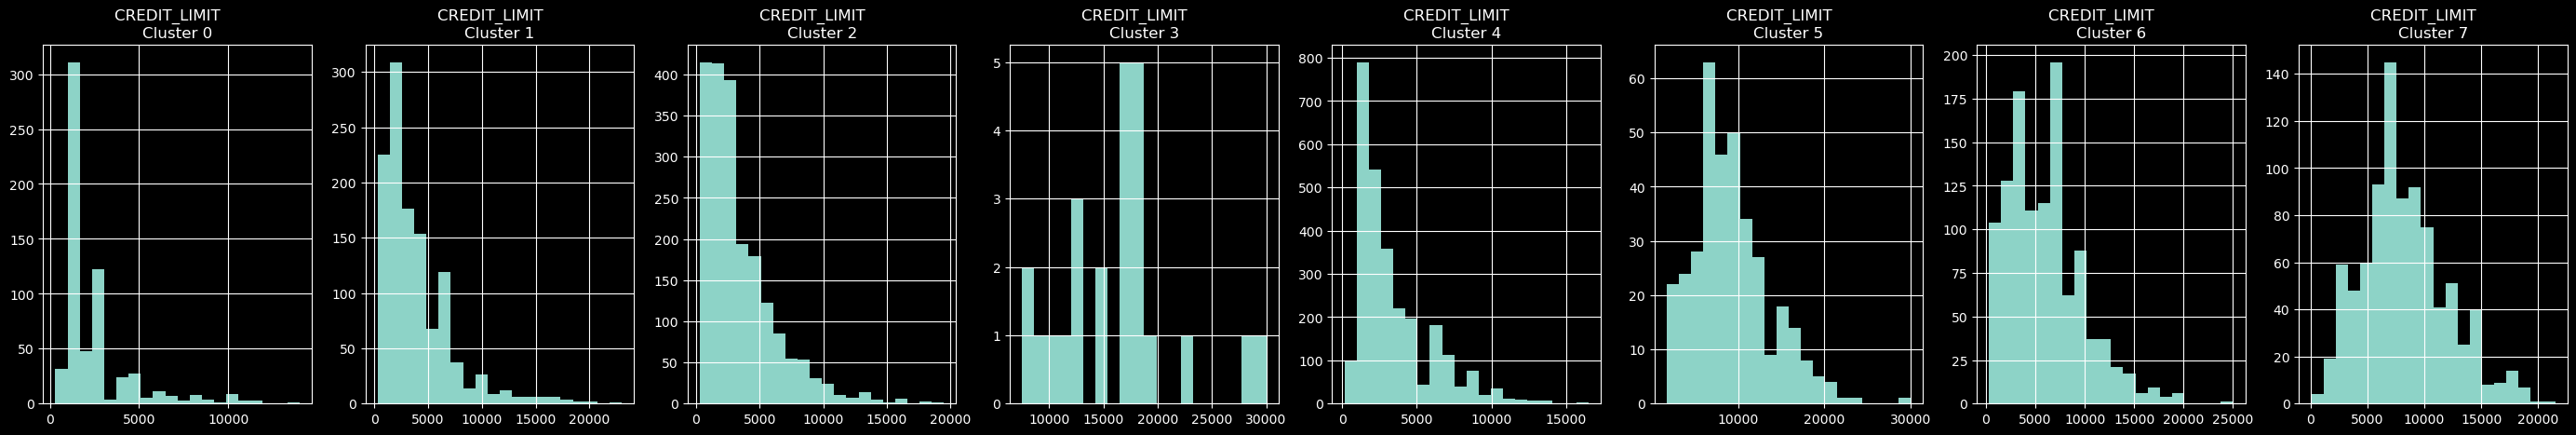

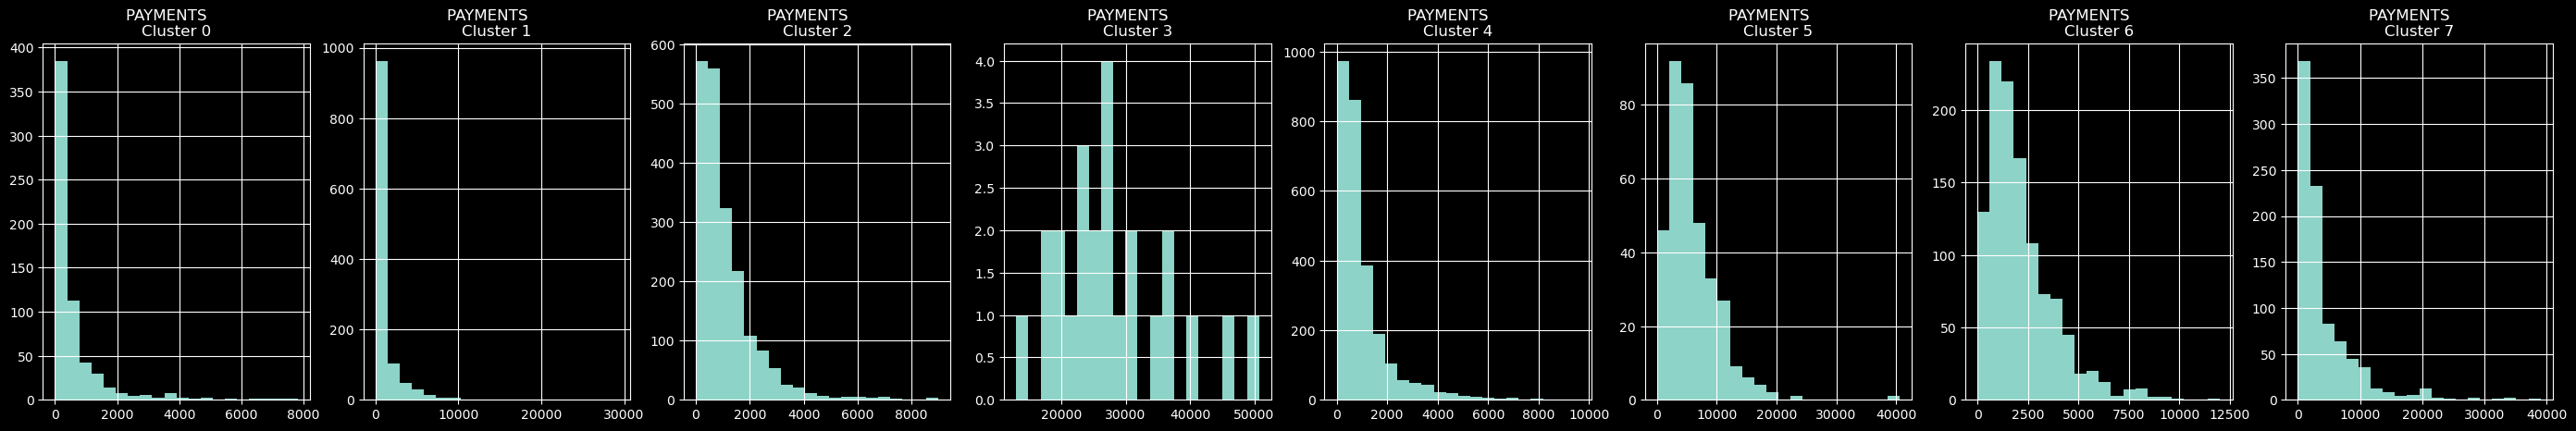

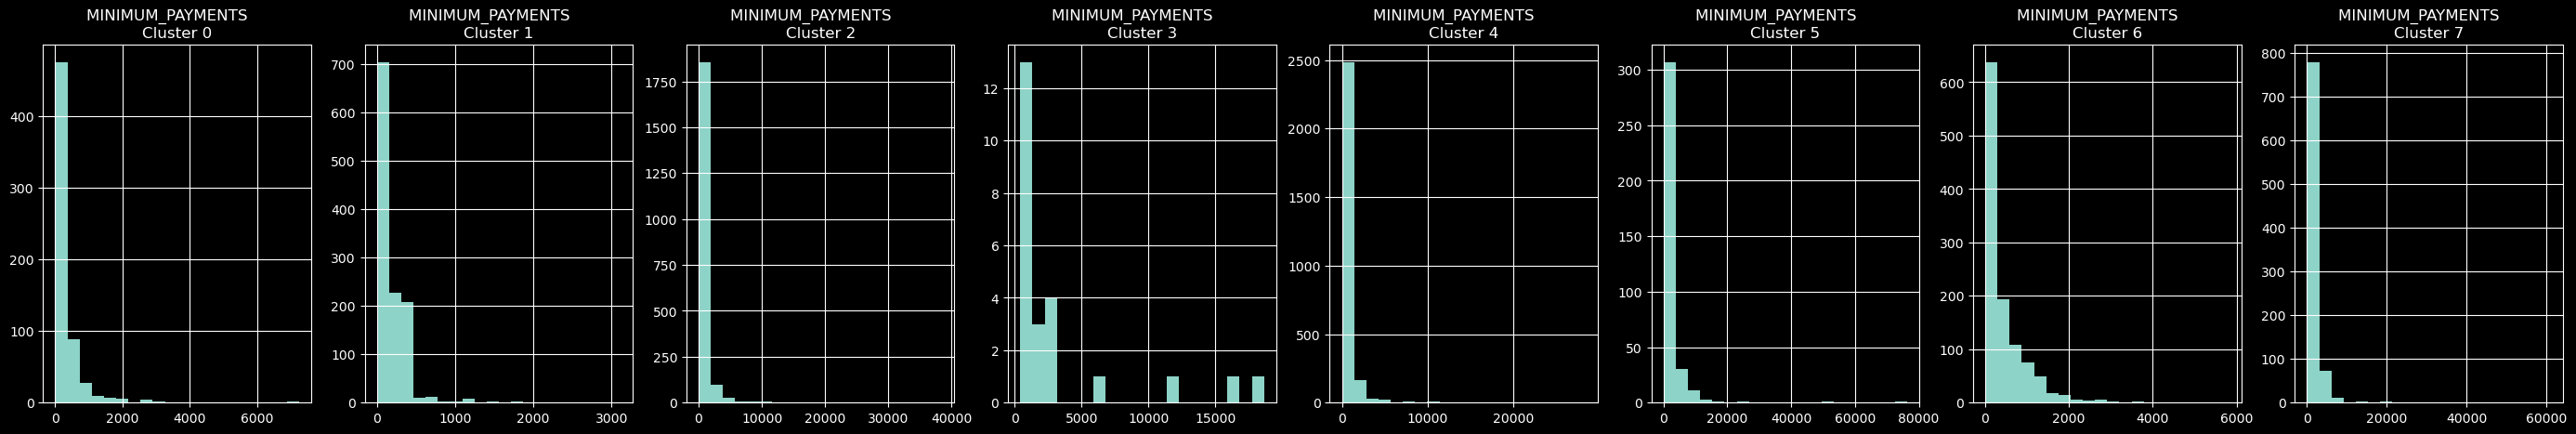

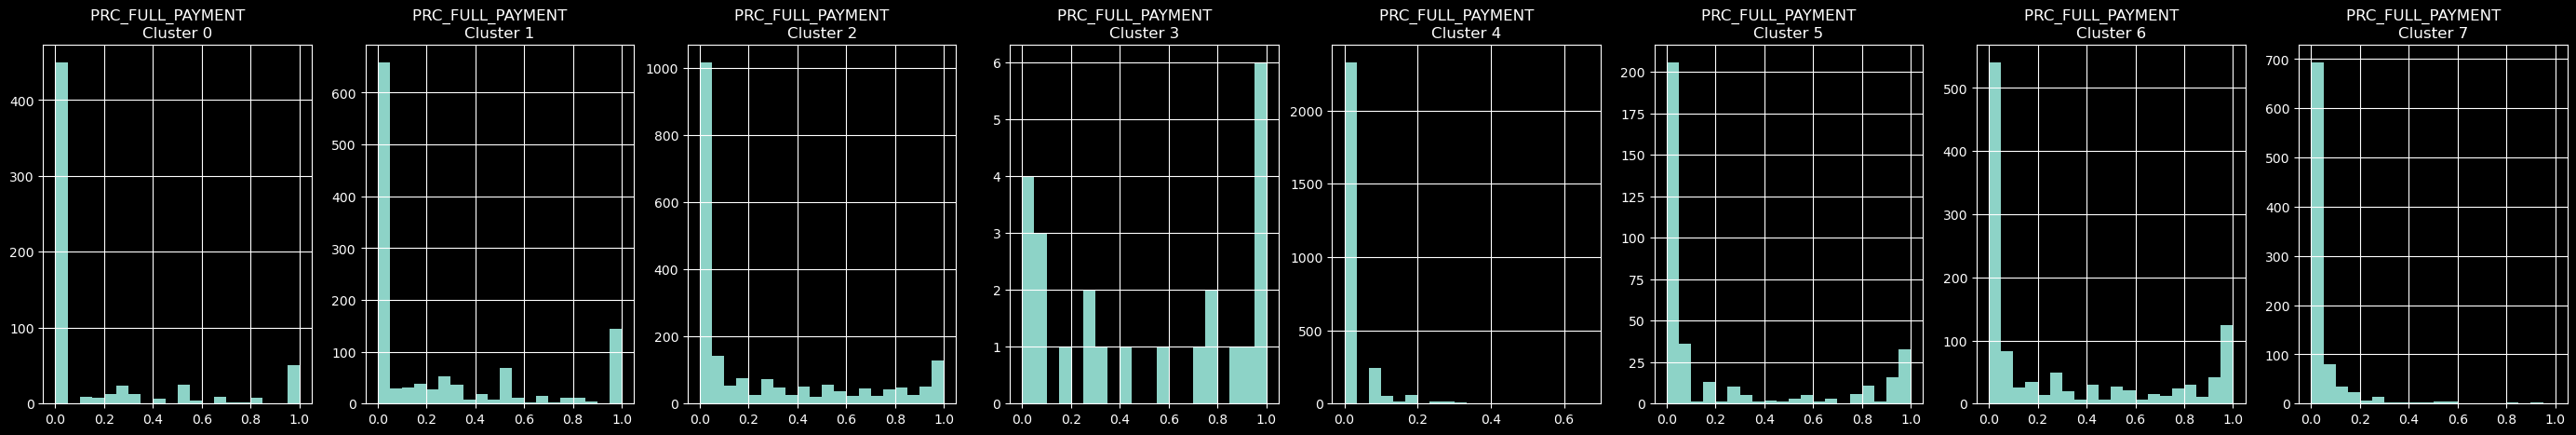

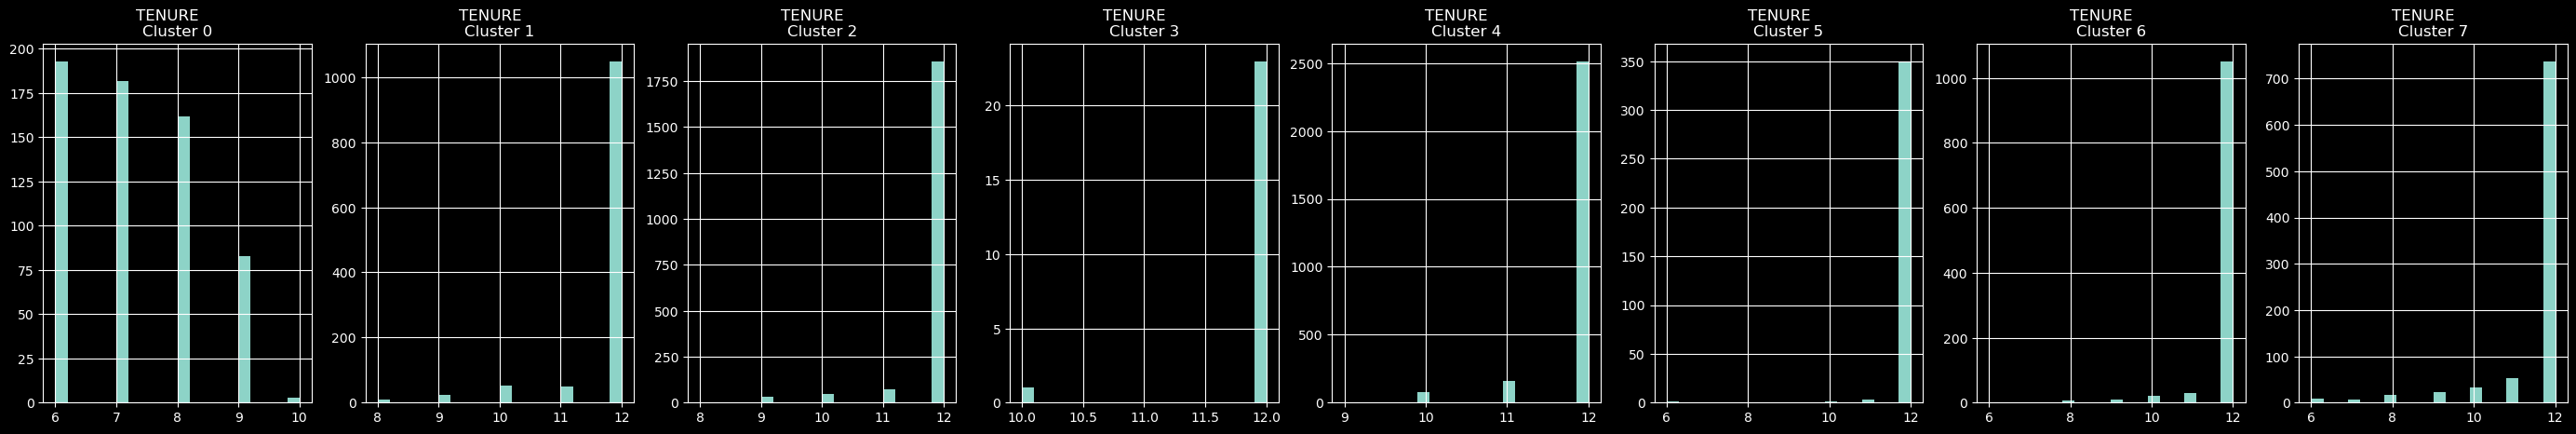

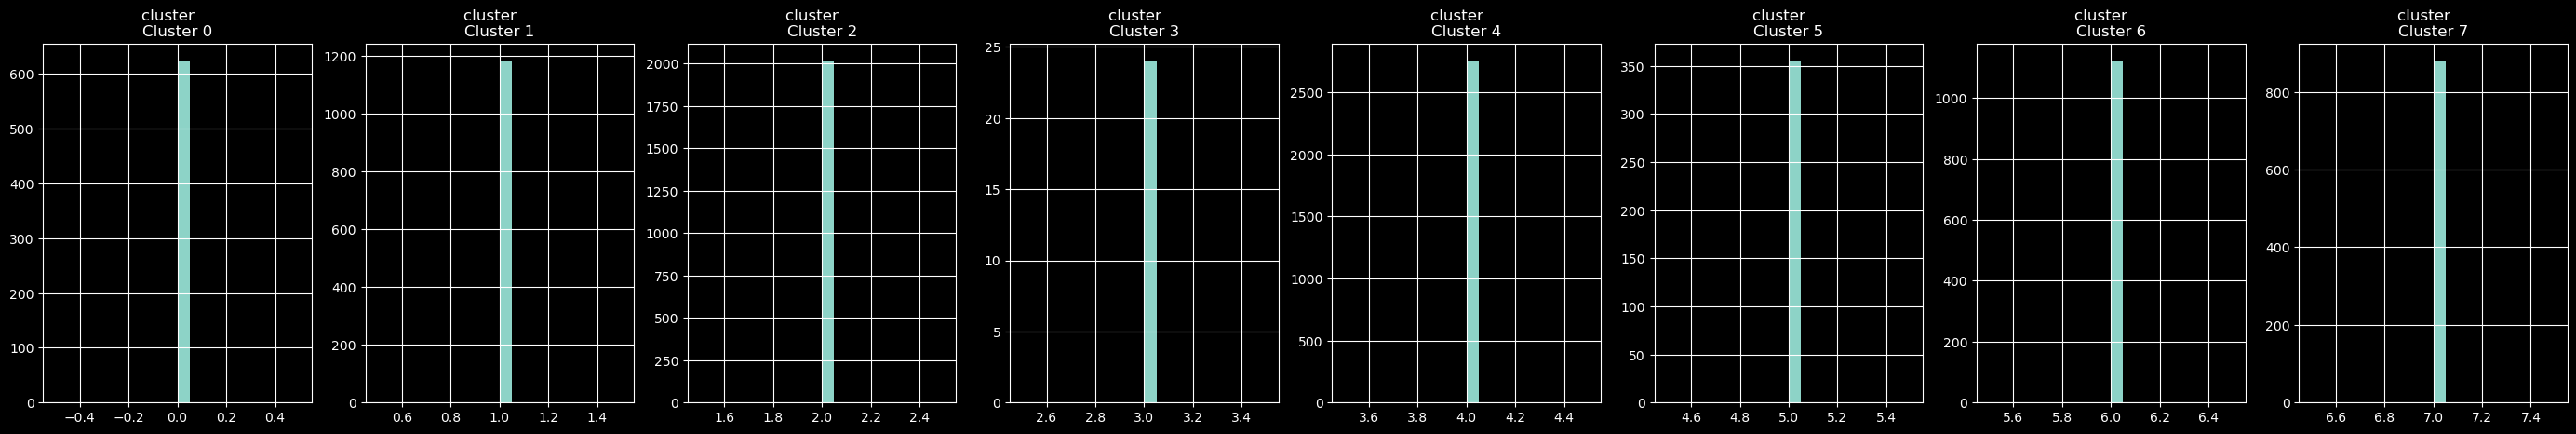

In [63]:
# Visualizamos histogramas para cada cluster 
for i in data_num_cluster.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = data_num_cluster[data_num_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


In [65]:
km = KMeans(n_clusters = 8)
y = km.fit_predict(data_scaled)
print(silhouette_score(data_scaled, y))
#df_country['k_means_pca'] = y

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.22191786180600045


In [ ]:
#pip install yellowbrick

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=9))

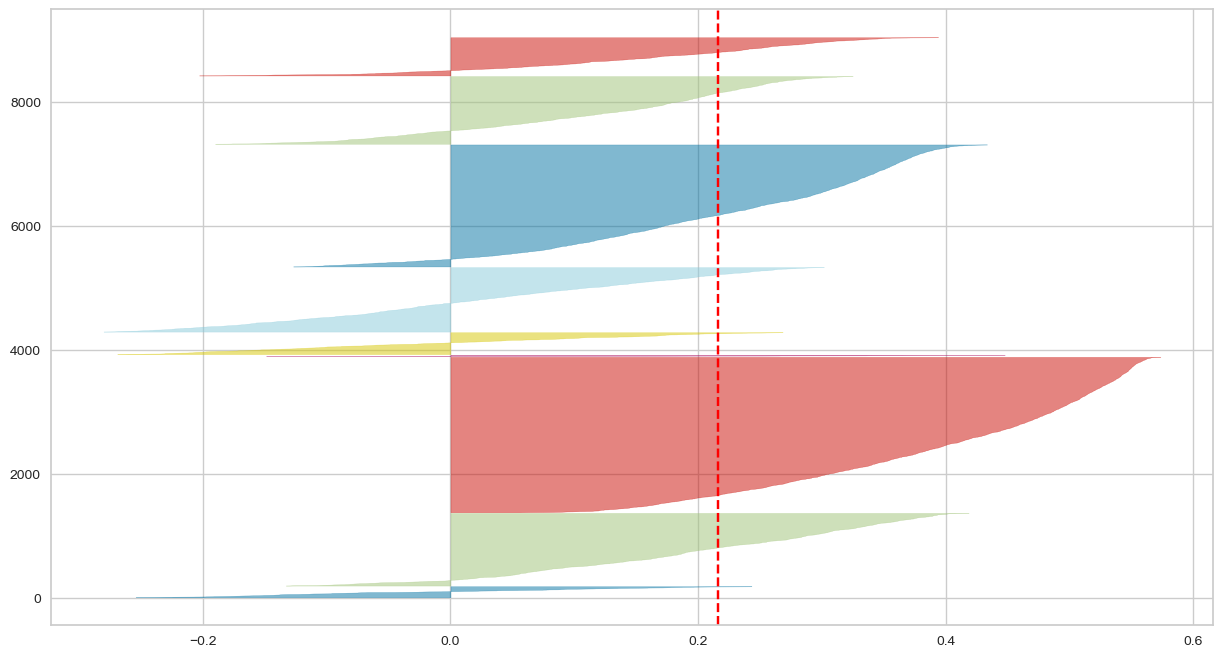

In [67]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=9) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)

## c. `PCA`

In [68]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-1.68364138, -1.07226412],
       [-1.13407191,  2.50911155],
       [ 0.96938952, -0.38354894],
       ...,
       [-0.92898147, -1.80806117],
       [-2.33784465, -0.65361806],
       [-0.55804521, -0.40059043]])

In [69]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

pca1      pca2
0 -1.683641 -1.072264
1 -1.134072  2.509112
2  0.969390 -0.383549
3 -0.888212  0.004623
4 -1.600015 -0.683814

In [70]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.683641 -1.072264        4
1 -1.134072  2.509112        7
2  0.969390 -0.383549        6
3 -0.888212  0.004623        4
4 -1.600015 -0.683814        4

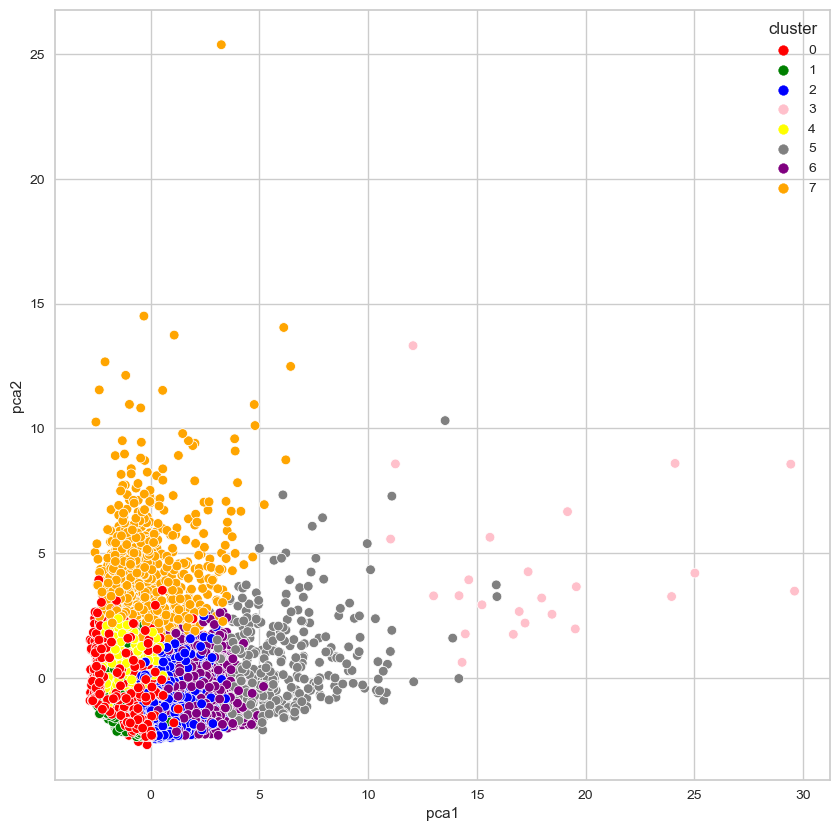

In [71]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "orange"])
plt.show()

## d. `Autoenconders`

In [105]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD # para el entrenamiento sea aleatorio

In [106]:
encoding_dim = 7 # comprimir a 7 variables

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded) # version comprimida

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [107]:
data_scaled.shape

(8950, 17)

In [108]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [109]:
autoencoder.fit(data_scaled, data_scaled, batch_size=128, epochs = 35, verbose = 1)

Epoch 1/35
70/70 [==============================] - 7s 80ms/step - loss: 0.5484
Epoch 2/35
70/70 [==============================] - 3s 43ms/step - loss: 0.3312
Epoch 3/35
70/70 [==============================] - 3s 40ms/step - loss: 0.2686
Epoch 4/35
70/70 [==============================] - 3s 42ms/step - loss: 0.2440
Epoch 5/35
70/70 [==============================] - 3s 41ms/step - loss: 0.2306
Epoch 6/35
70/70 [==============================] - 3s 48ms/step - loss: 0.2040
Epoch 7/35
70/70 [==============================] - 4s 51ms/step - loss: 0.1902
Epoch 8/35
70/70 [==============================] - 3s 42ms/step - loss: 0.1904
Epoch 9/35
70/70 [==============================] - 3s 45ms/step - loss: 0.1776
Epoch 10/35
70/70 [==============================] - 3s 42ms/step - loss: 0.1726
Epoch 11/35
70/70 [==============================] - 3s 41ms/step - loss: 0.1716
Epoch 12/35
70/70 [==============================] - 3s 43ms/step - loss: 0.1612
Epoch 13/35
70/70 [==================

In [110]:
autoencoder.save_weights('autoencoder.h5') #guardar los pesos

In [111]:
pred = encoder.predict(data_scaled)

280/280 [==============================] - 1s 4ms/step


In [112]:
pred.shape

(8950, 10)

In [113]:
pred

array([[0.58717287, 0.        , 1.2050772 , ..., 0.        , 0.        ,
        0.        ],
       [2.9676259 , 0.        , 2.347551  , ..., 0.        , 0.        ,
        0.        ],
       [3.2233849 , 0.        , 3.384798  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04943341, 0.        , 2.1306627 , ..., 0.        , 0.        ,
        0.        ],
       [0.06471739, 0.        , 0.7856571 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.91165537, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [114]:
Sum_of_squared_distances_2 = []
silhouette_scores_2 = []
range_values = range(2,15) 
for _ in range_values:
    kmeans = KMeans(n_clusters = _)
    y = kmeans.fit_predict(pred)
    Sum_of_squared_distances_2.append(kmeans.inertia_)
    silhouette_scores_2.append(silhouette_score(pred,y))

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

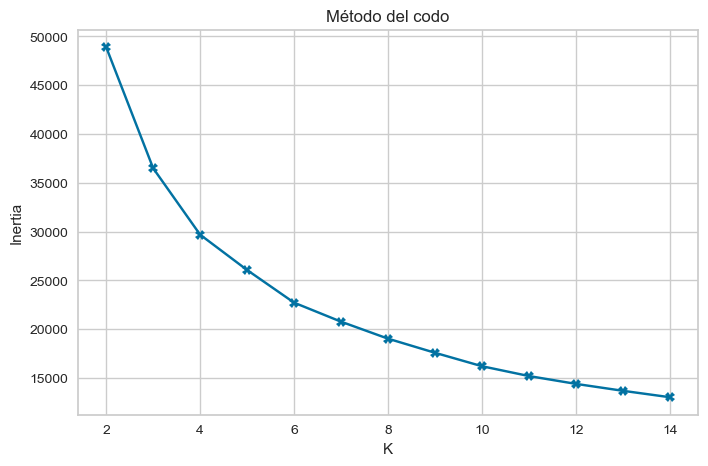

In [136]:
plt.figure(figsize=(8,5))
plt.plot(range_values,Sum_of_squared_distances_2,'bX-')
plt.title('Método del codo')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

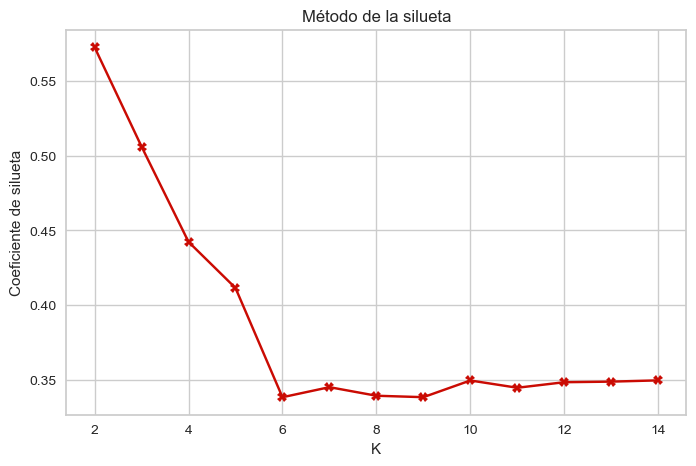

In [137]:
plt.figure(figsize=(8,5))
plt.plot(range_values,silhouette_scores_2,'rX-')
plt.title('Método de la silueta')
plt.xlabel('K')
plt.ylabel('Coeficiente de silueta')
plt.show()

C:\Users\wmr_w\AppData\Local\Temp\ipykernel_3488\463630700.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bX-" (-> color='b'). The keyword argument will take precedence.

C:\Users\wmr_w\AppData\Local\Temp\ipykernel_3488\463630700.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bX-" (-> color='b'). The keyword argument will take precedence.



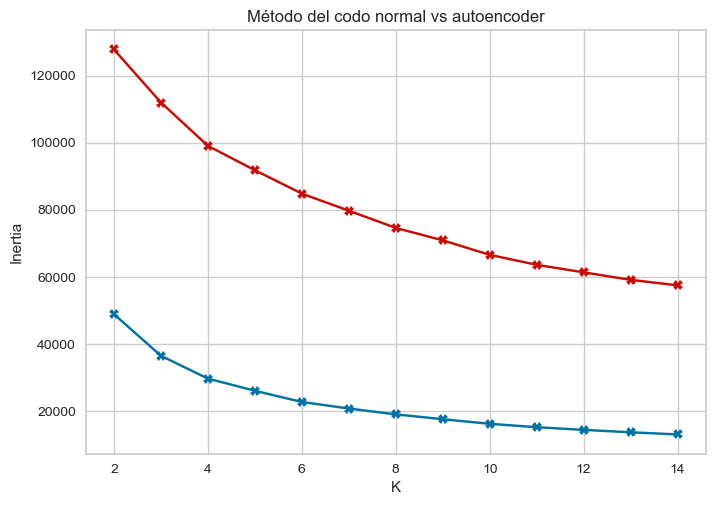

In [140]:
plt.title('Método del codo normal vs autoencoder')
plt.plot(range_values, Sum_of_squared_distances, 'bX-', color = "r")
plt.plot(range_values, Sum_of_squared_distances_2, 'bX-', color = "b")
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [128]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels_2 = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Centroides

In [129]:
cluster_centers_2 = pd.DataFrame(data = kmeans.cluster_centers_,)# columns=[data_num.columns])
cluster_centers_2

0    1          2    3          4    5    6    7    8    9
0   1.010919  0.0   1.145979  0.0   1.004763  0.0  0.0  0.0  0.0  0.0
1   2.116060  0.0   3.320816  0.0   2.628062  0.0  0.0  0.0  0.0  0.0
2  16.012442  0.0  15.832155  0.0  13.974867  0.0  0.0  0.0  0.0  0.0
3   5.070058  0.0   5.611789  0.0   5.234208  0.0  0.0  0.0  0.0  0.0

In [89]:
import tensorflow as tf

Unir data original con las nuevas etiquetas

In [130]:
data_dr = pd.concat([data_num, pd.DataFrame({'cluster': labels_2})], axis = 1)
data_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        312.343947          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

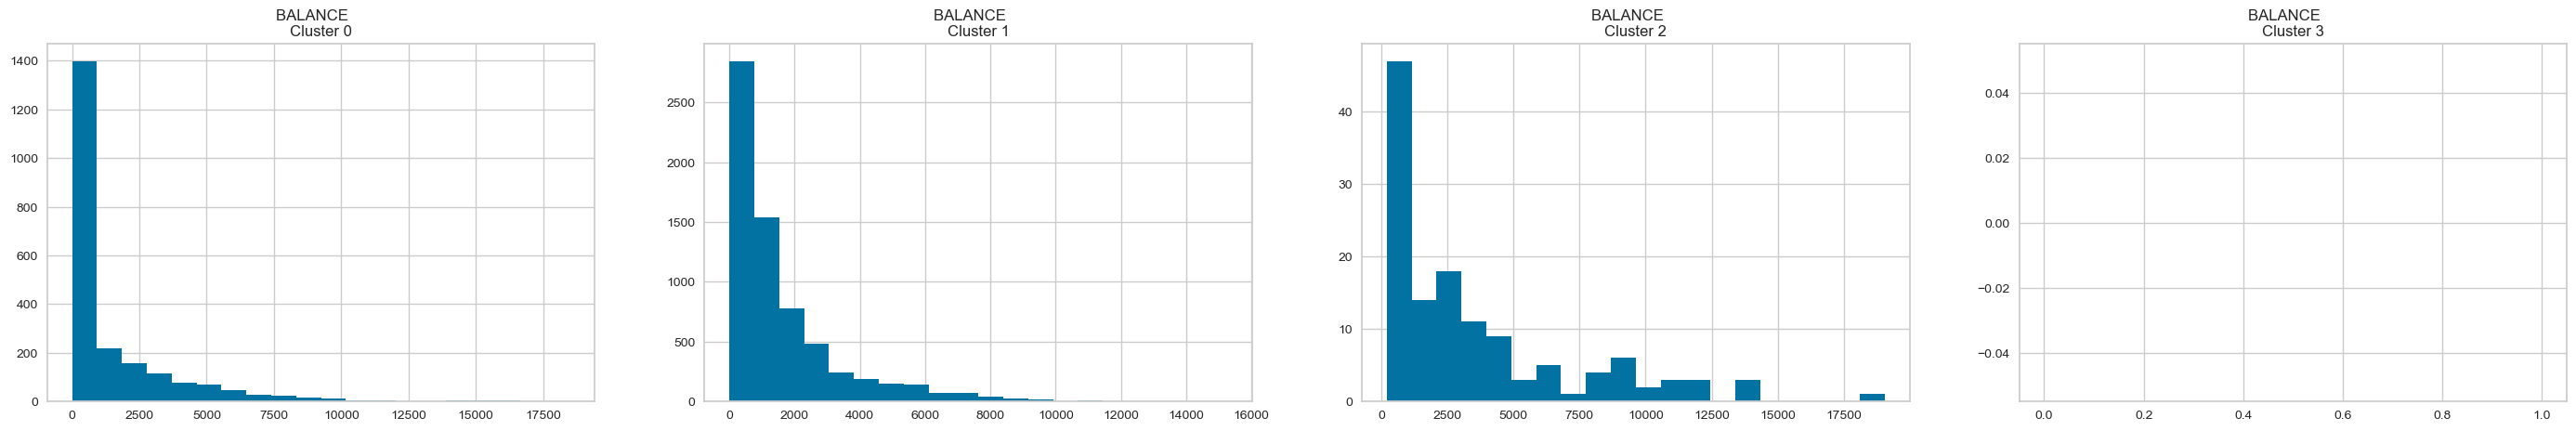

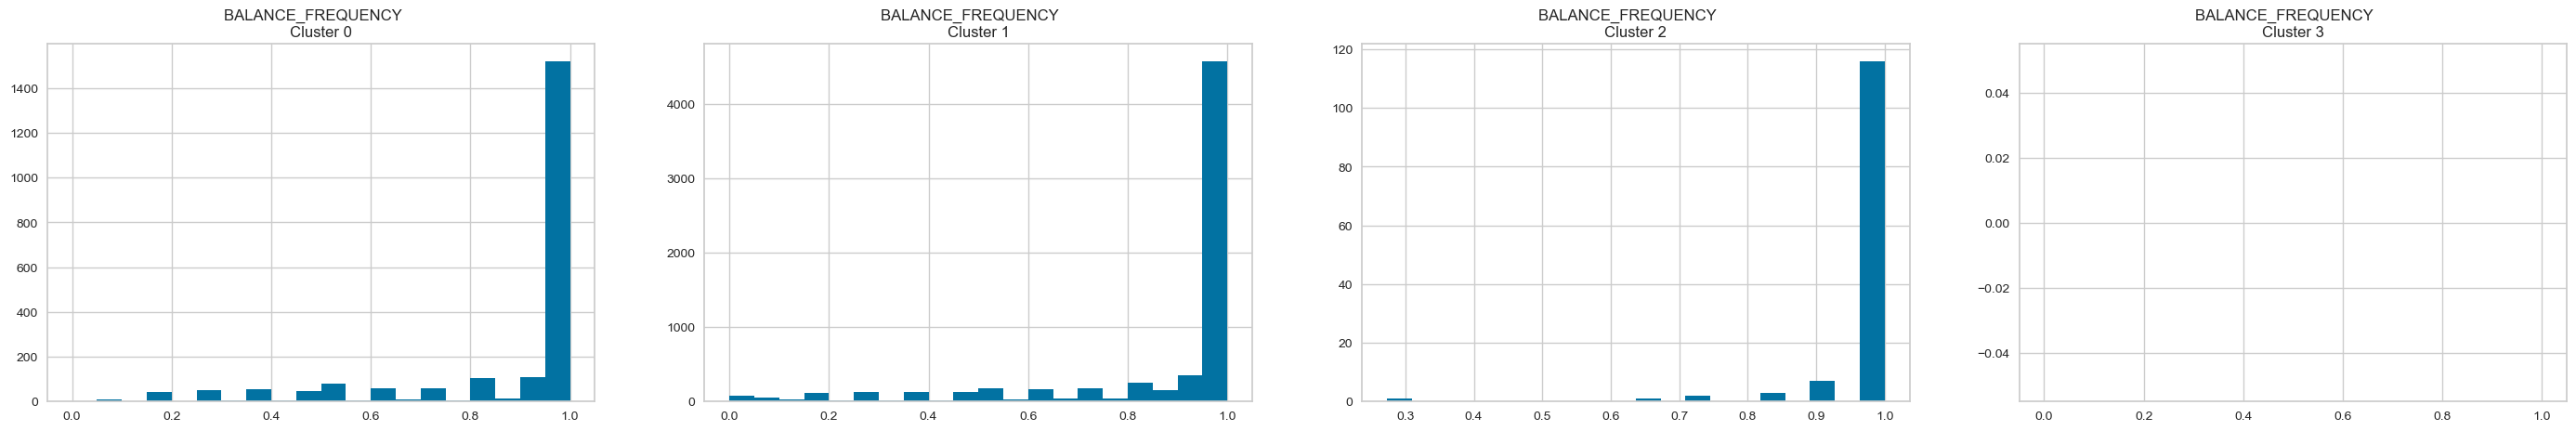

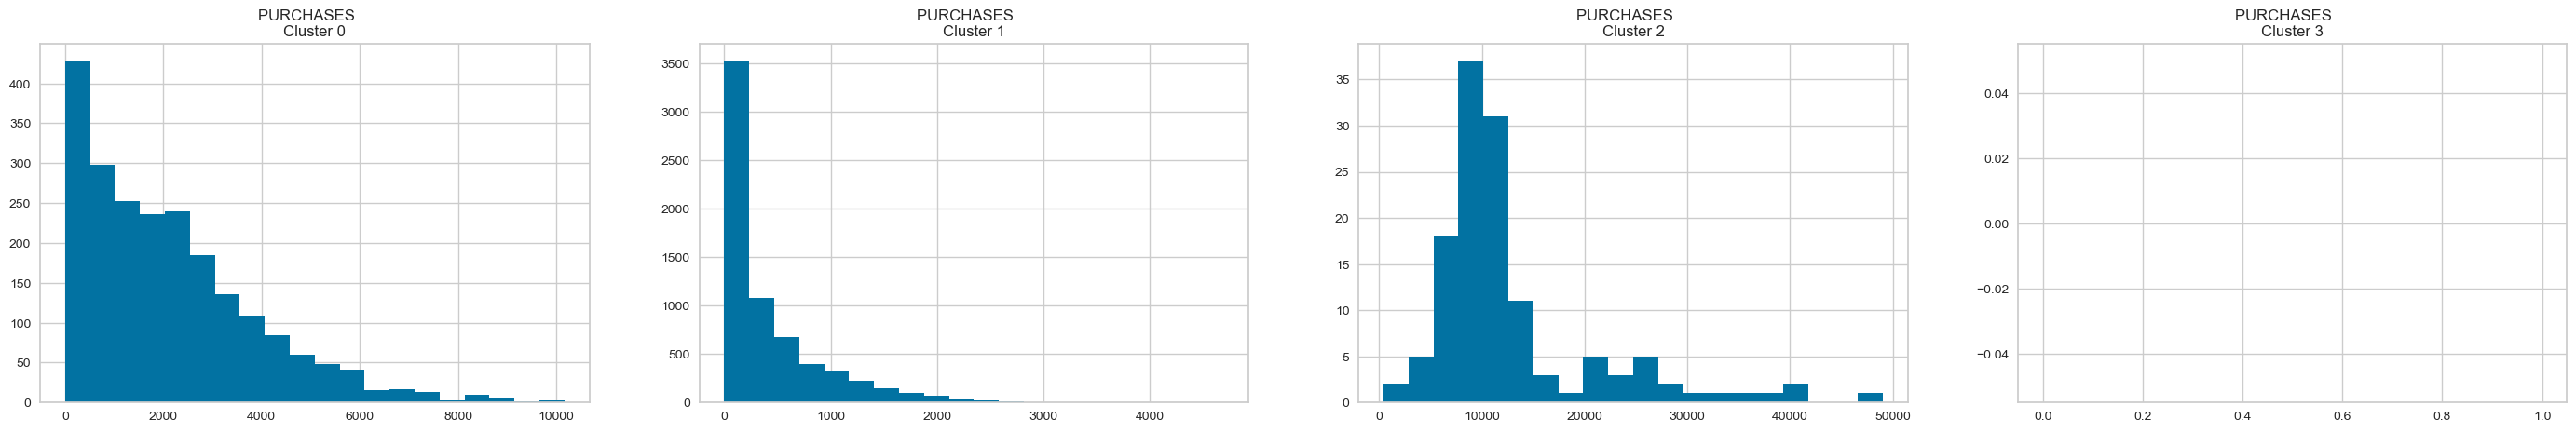

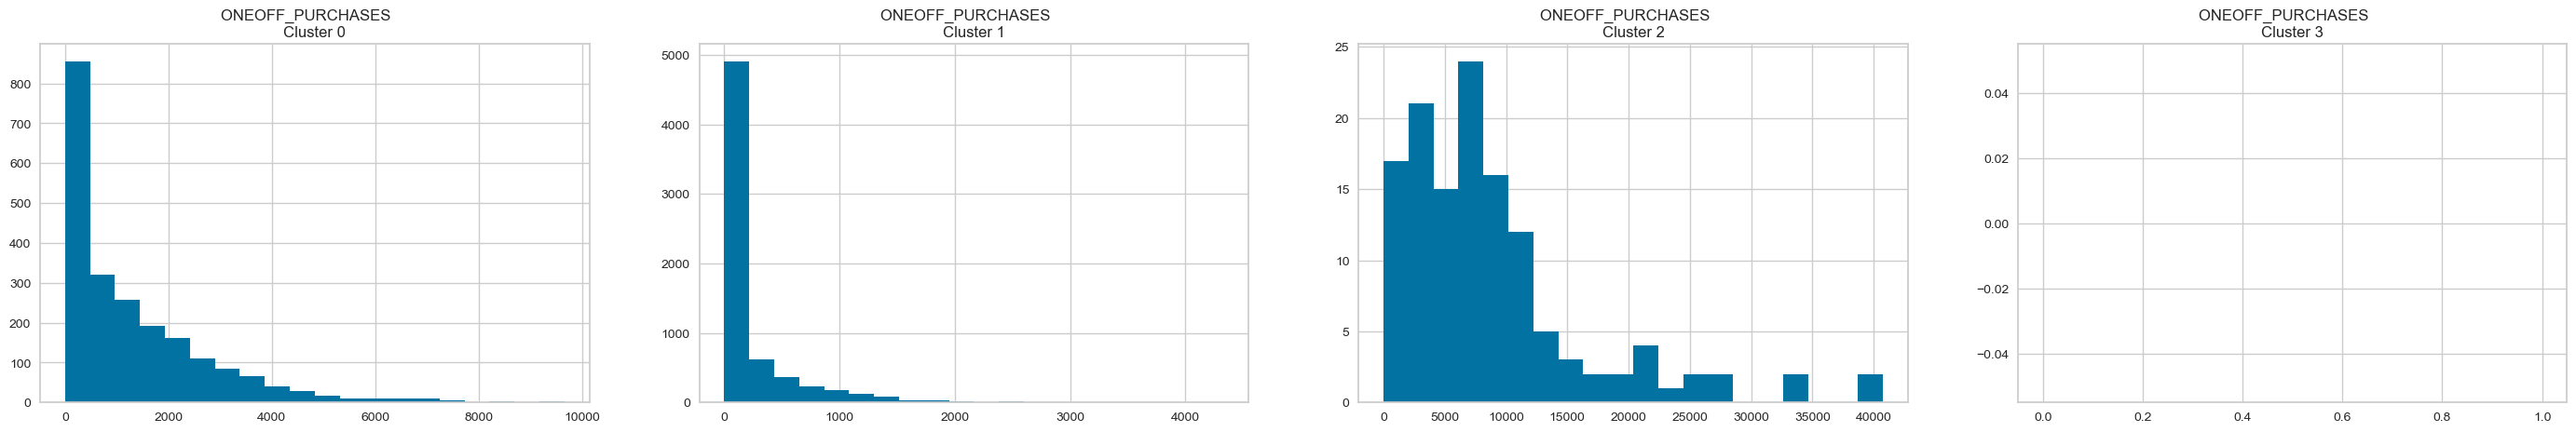

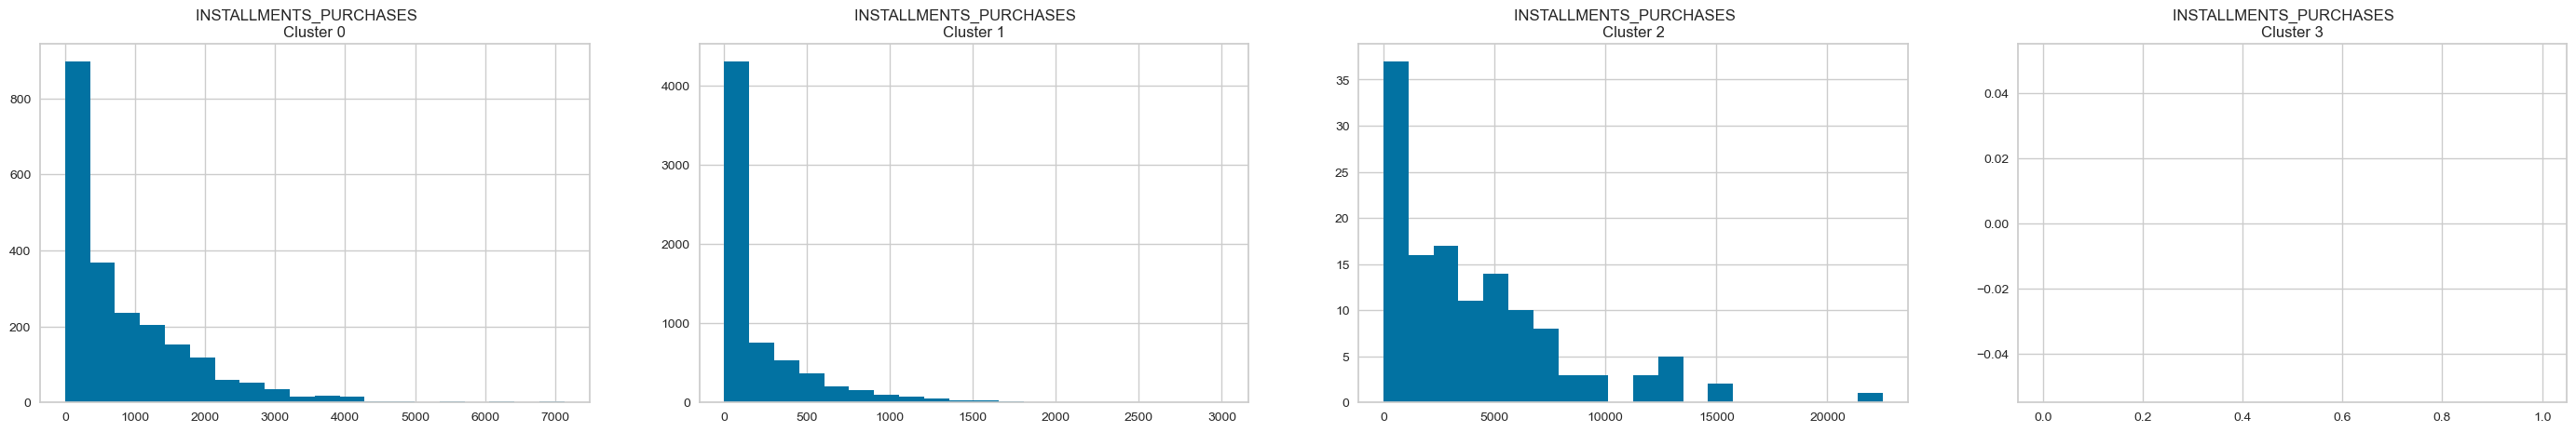

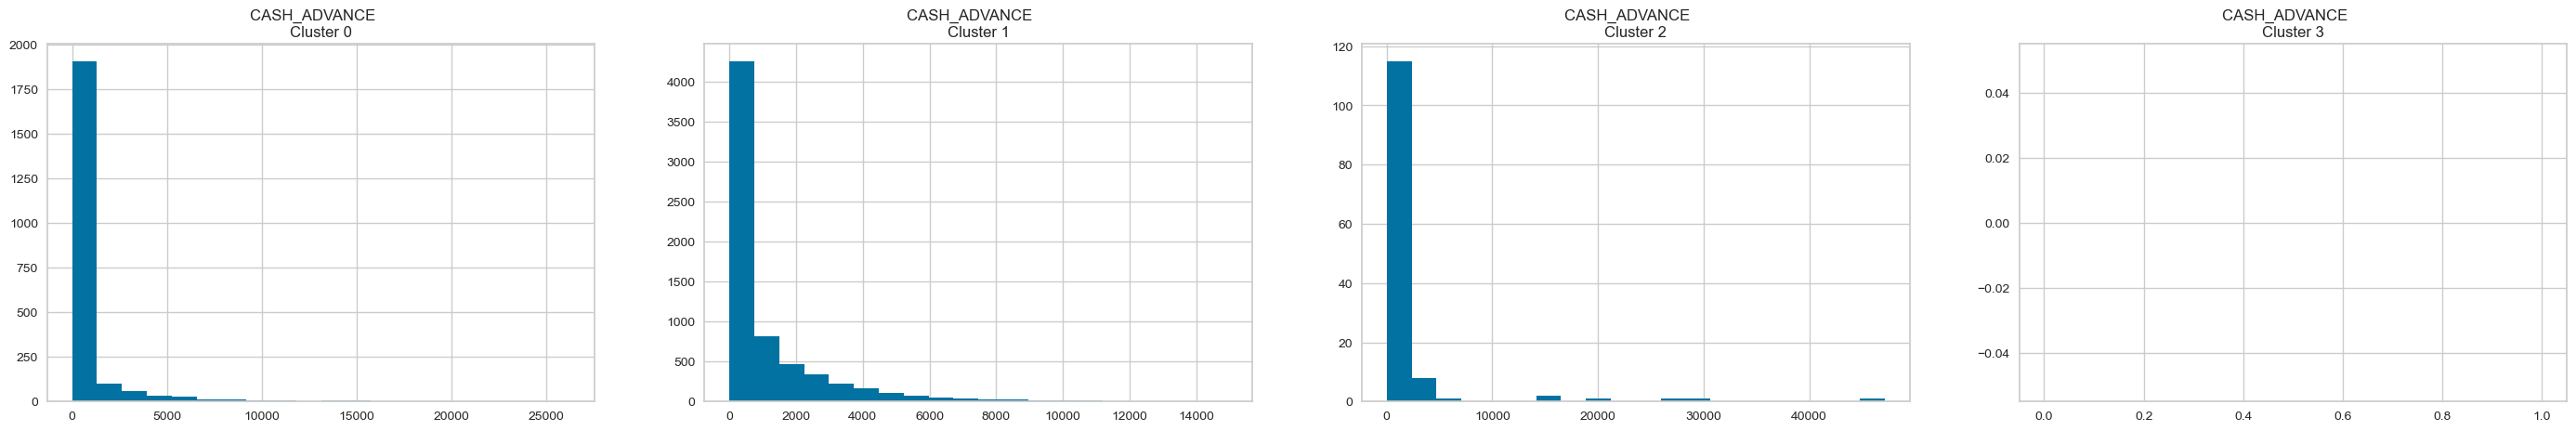

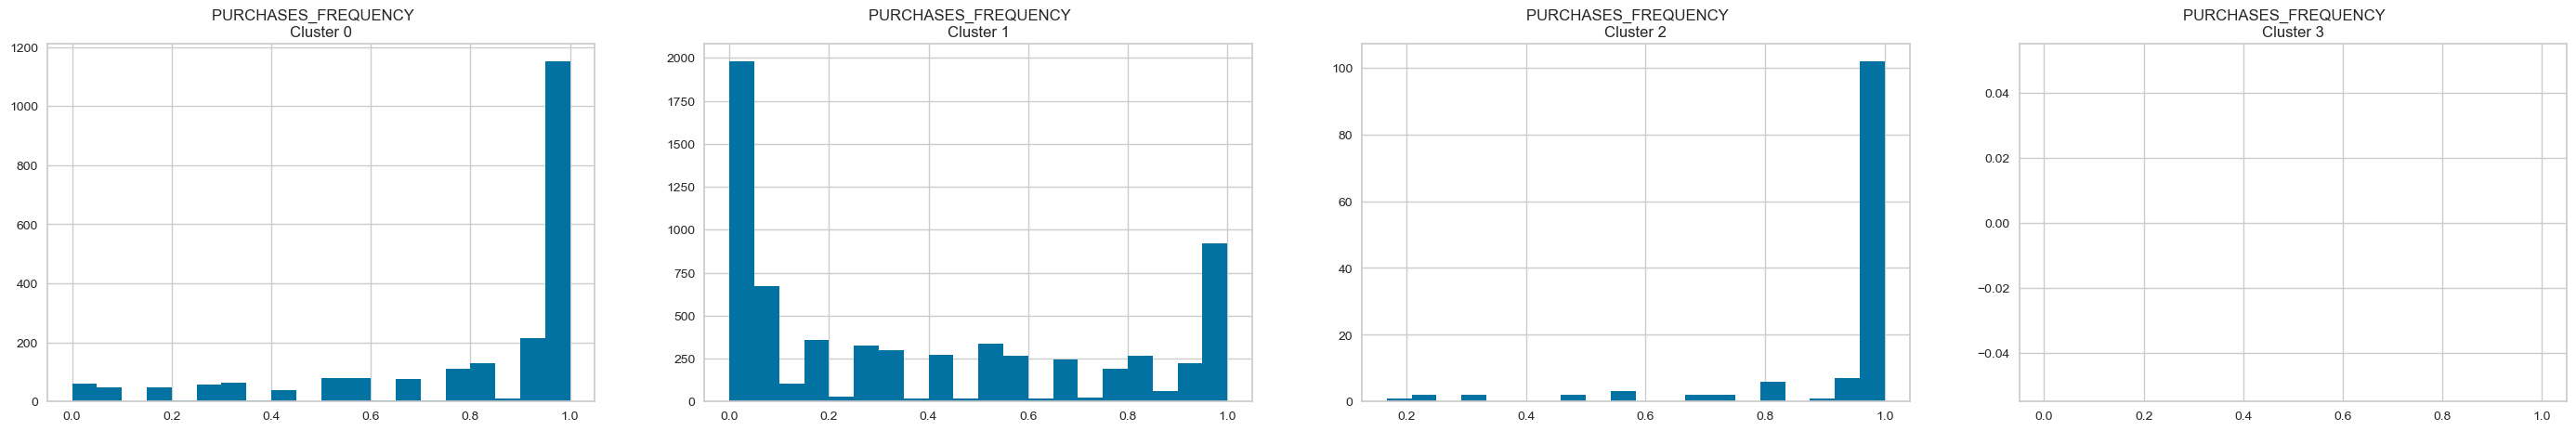

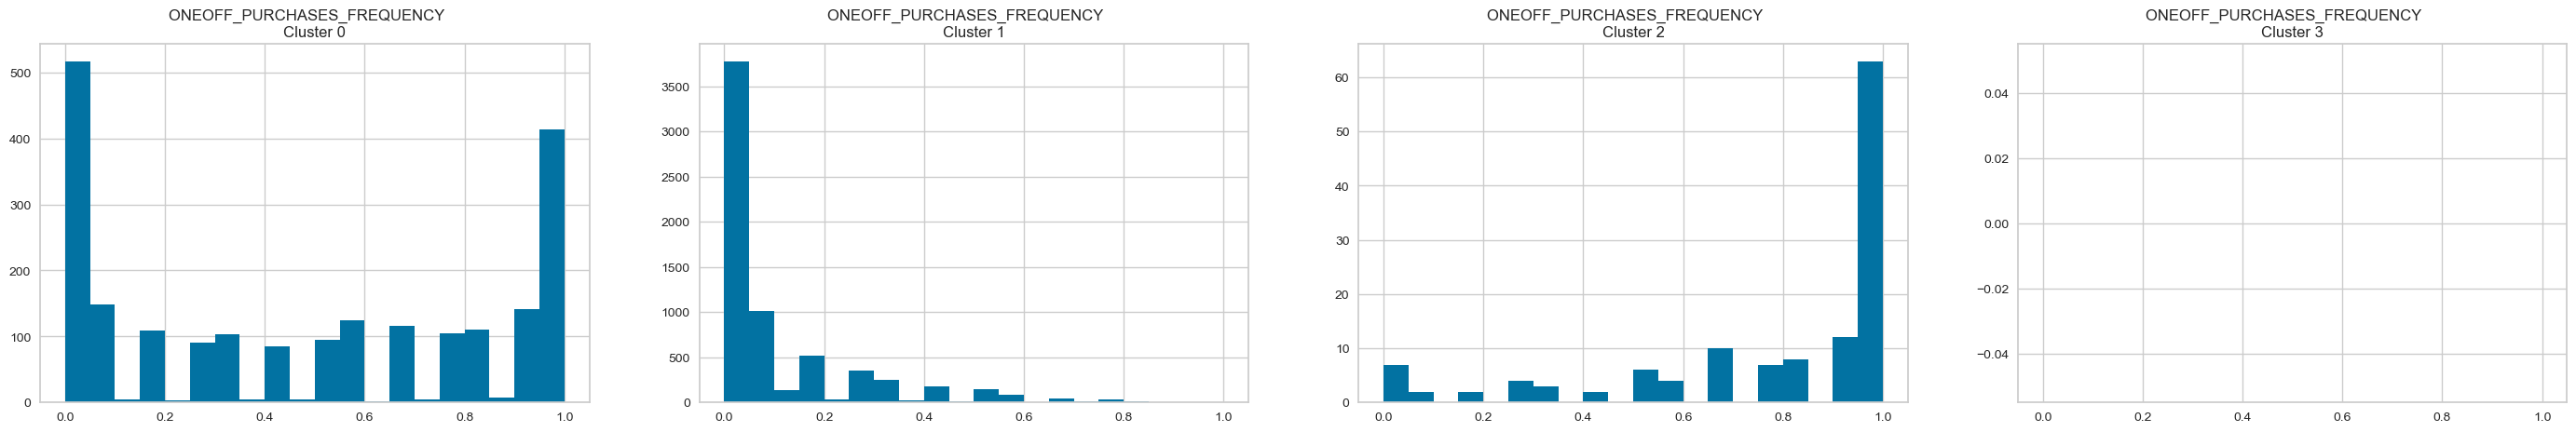

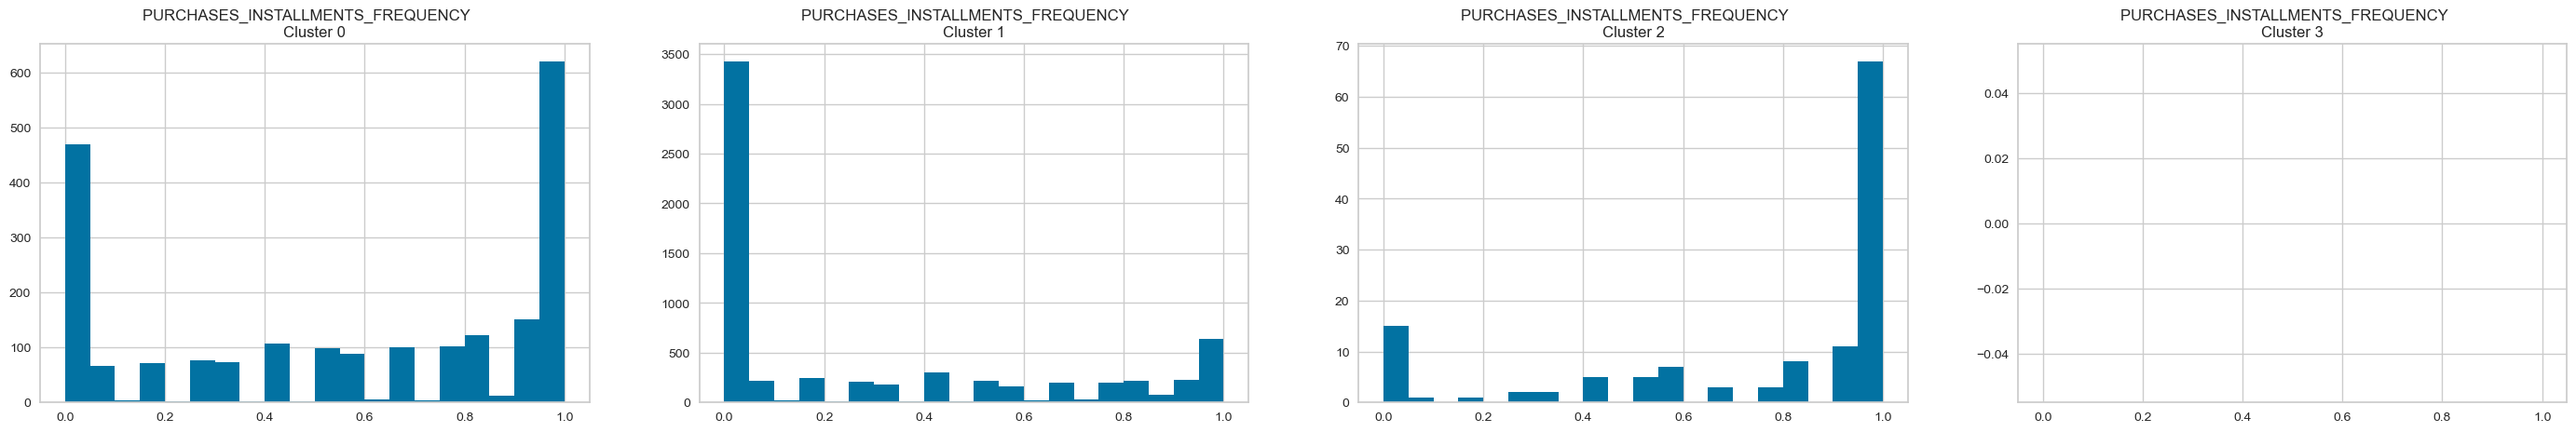

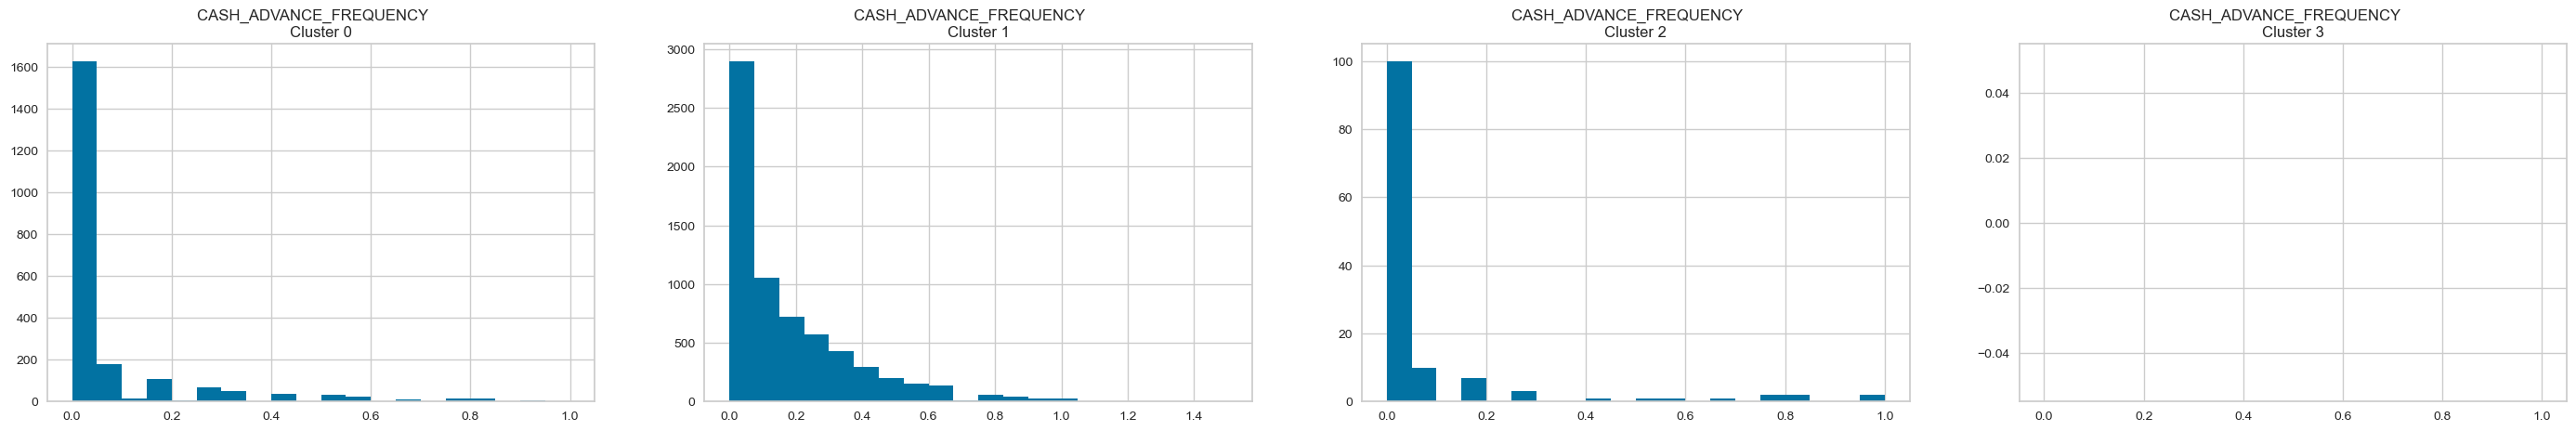

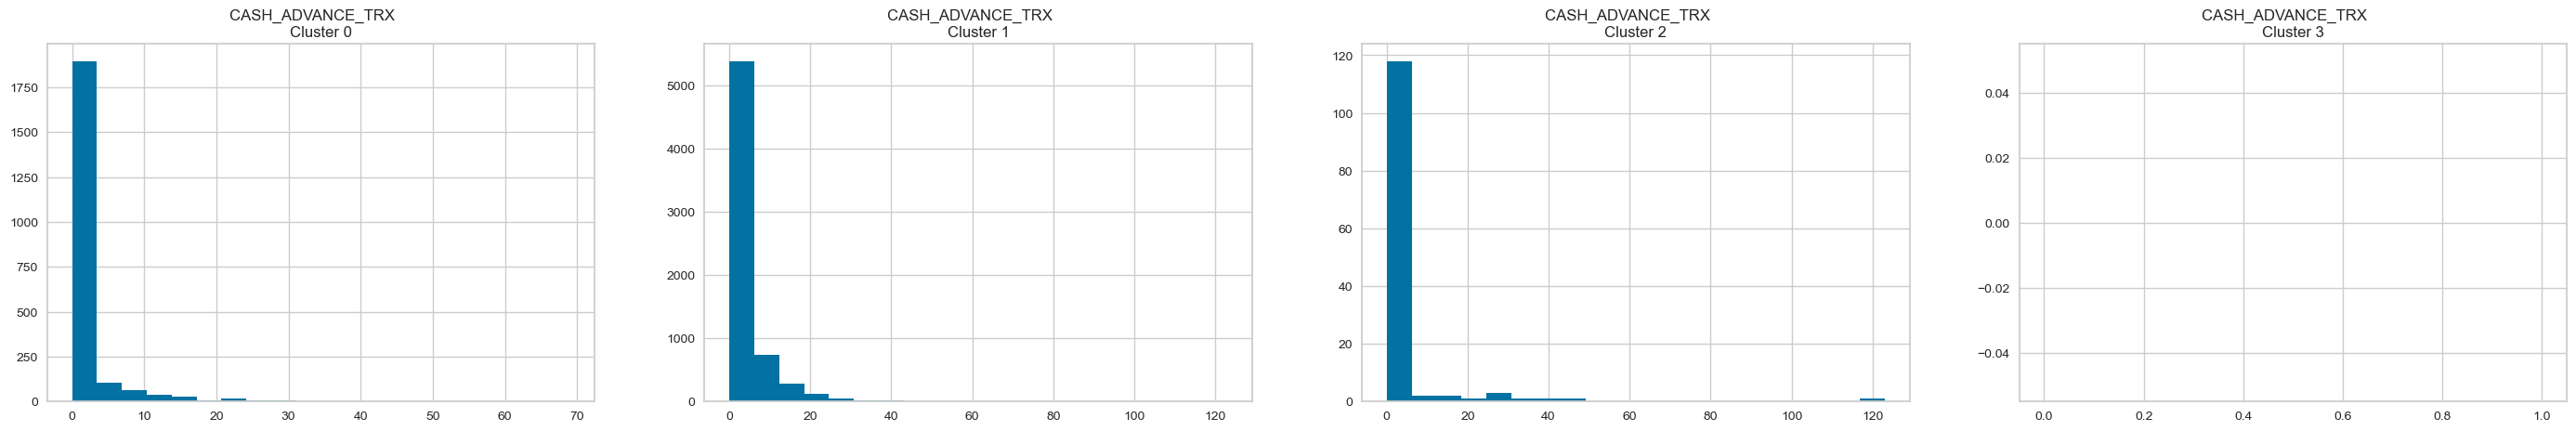

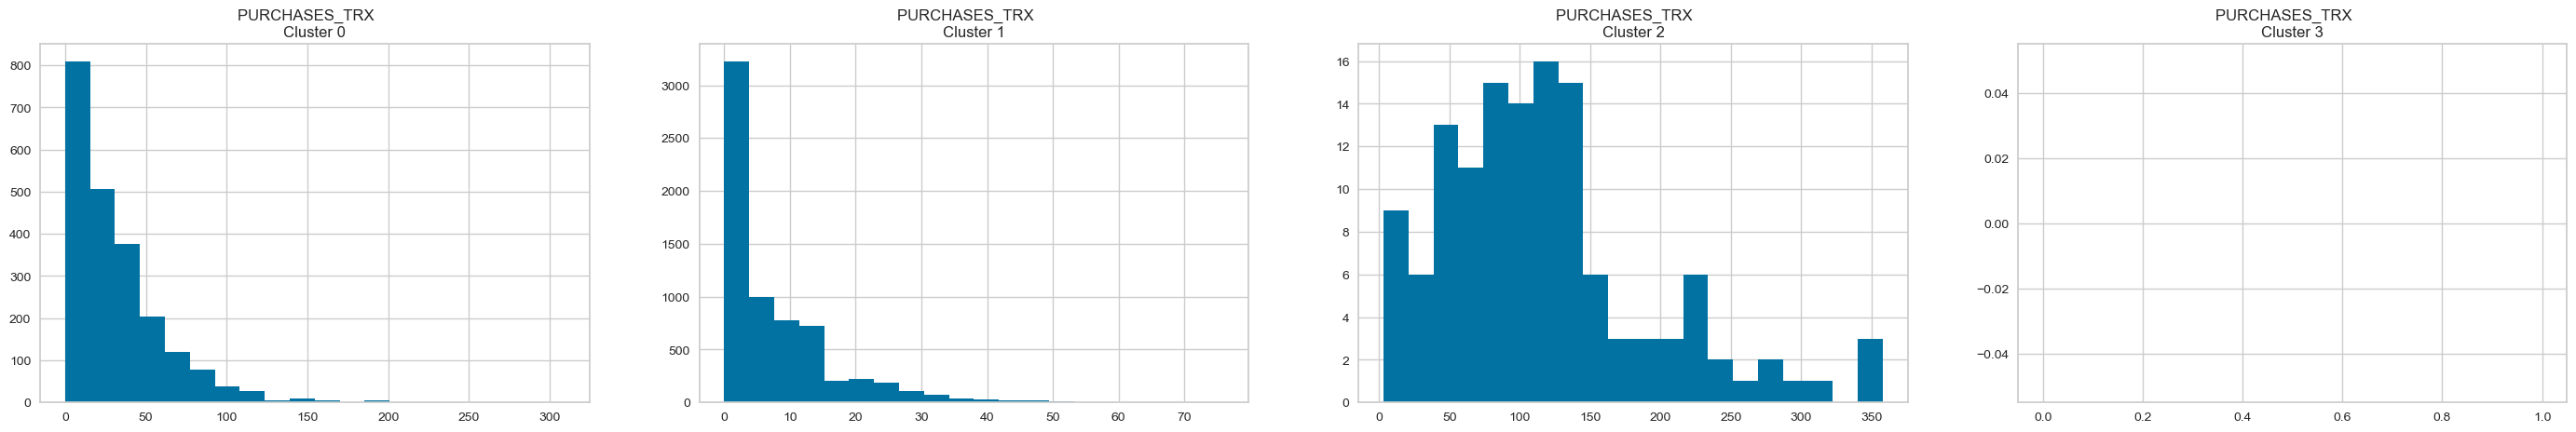

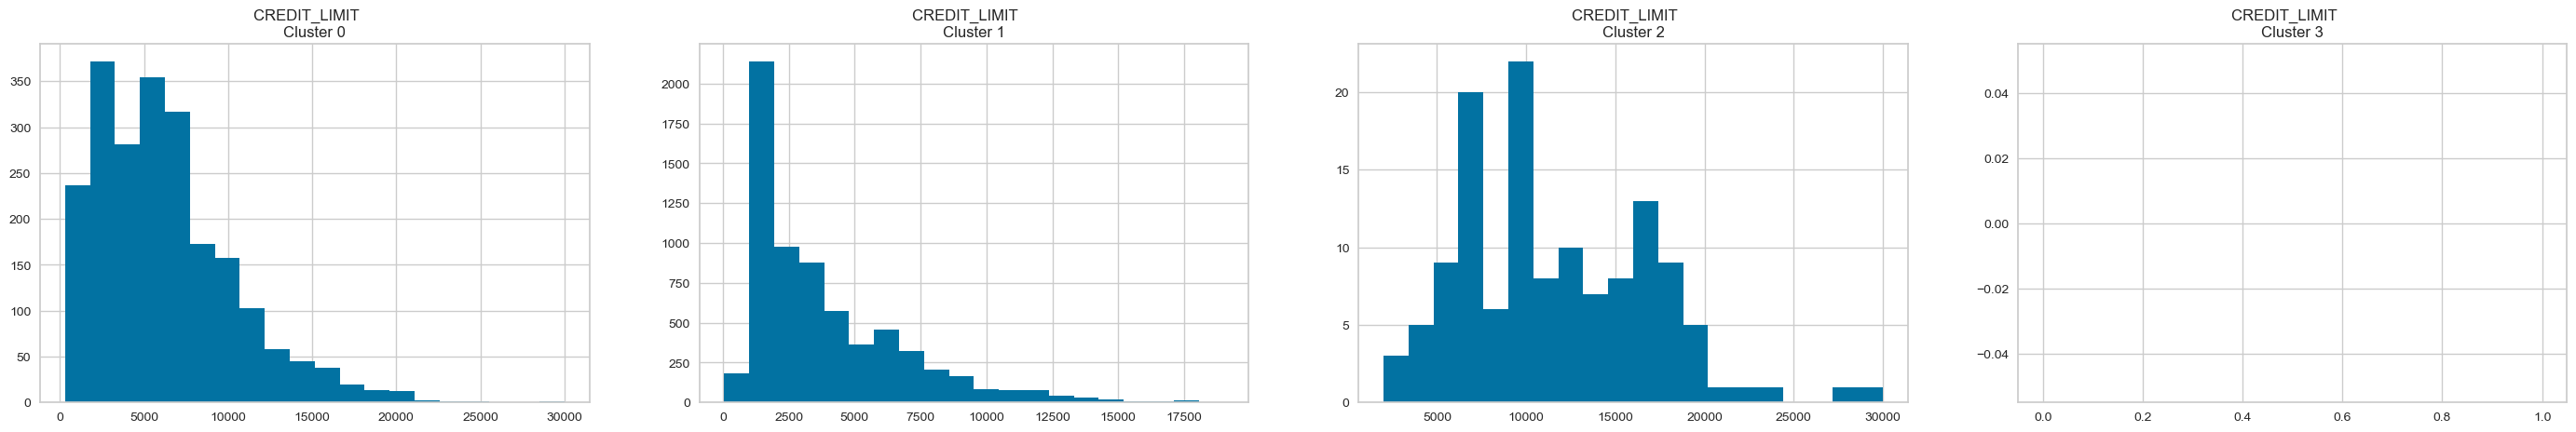

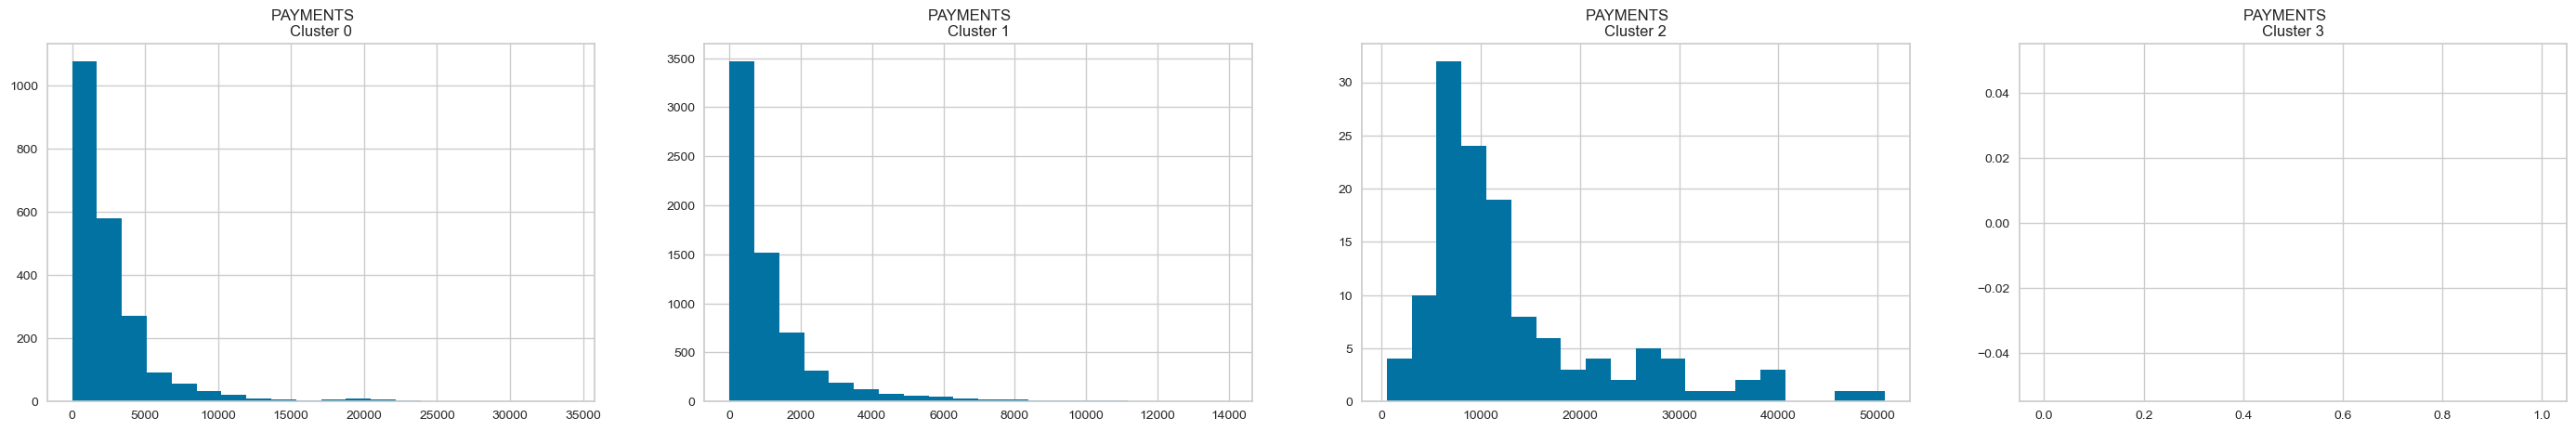

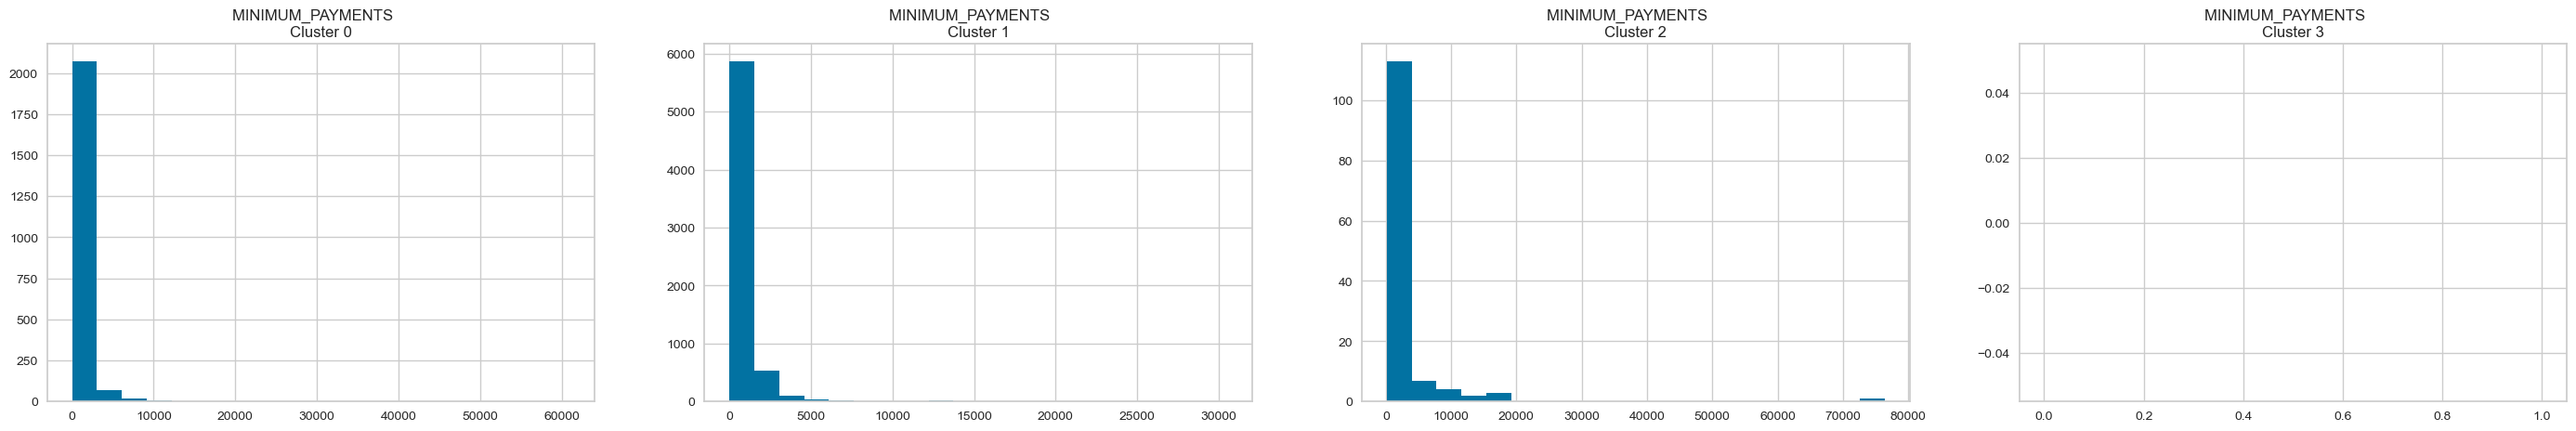

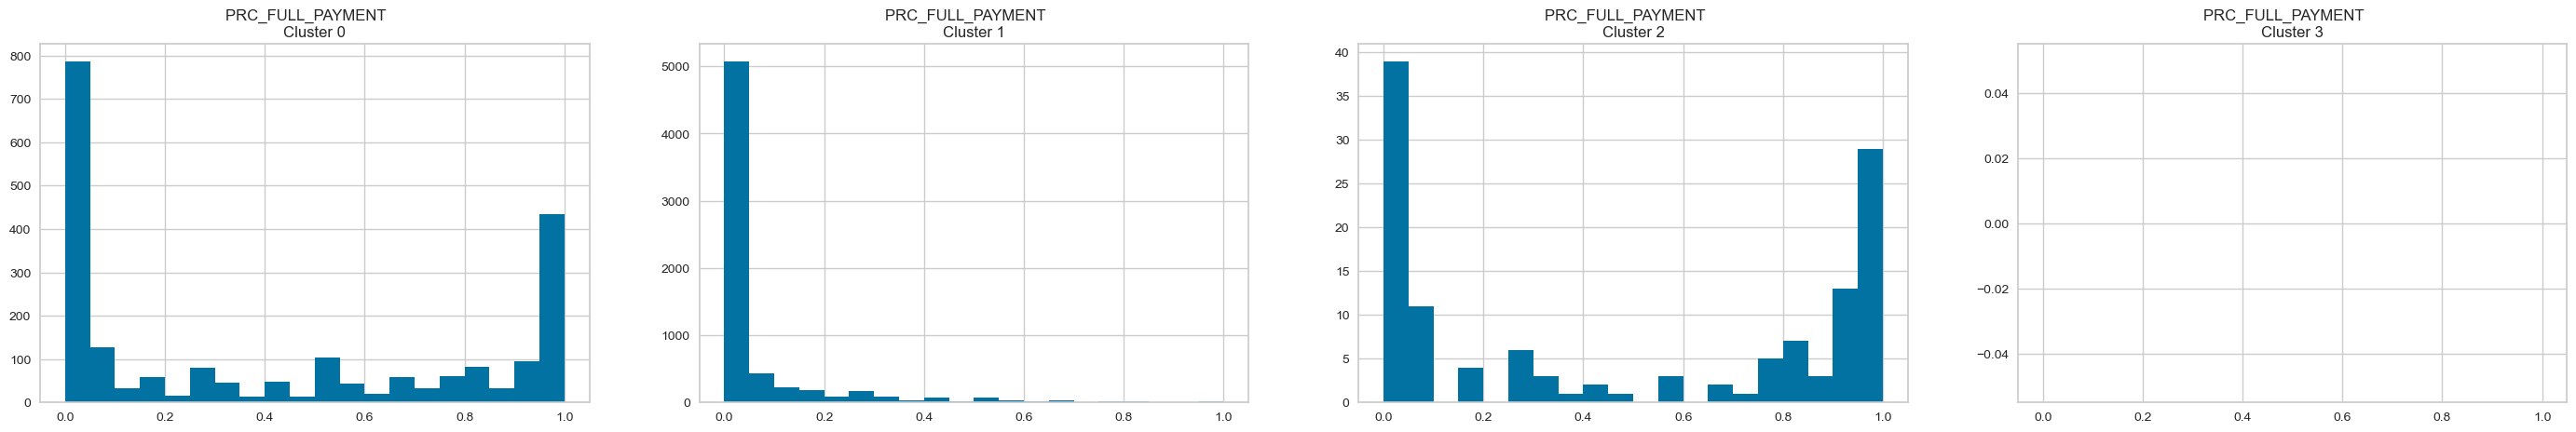

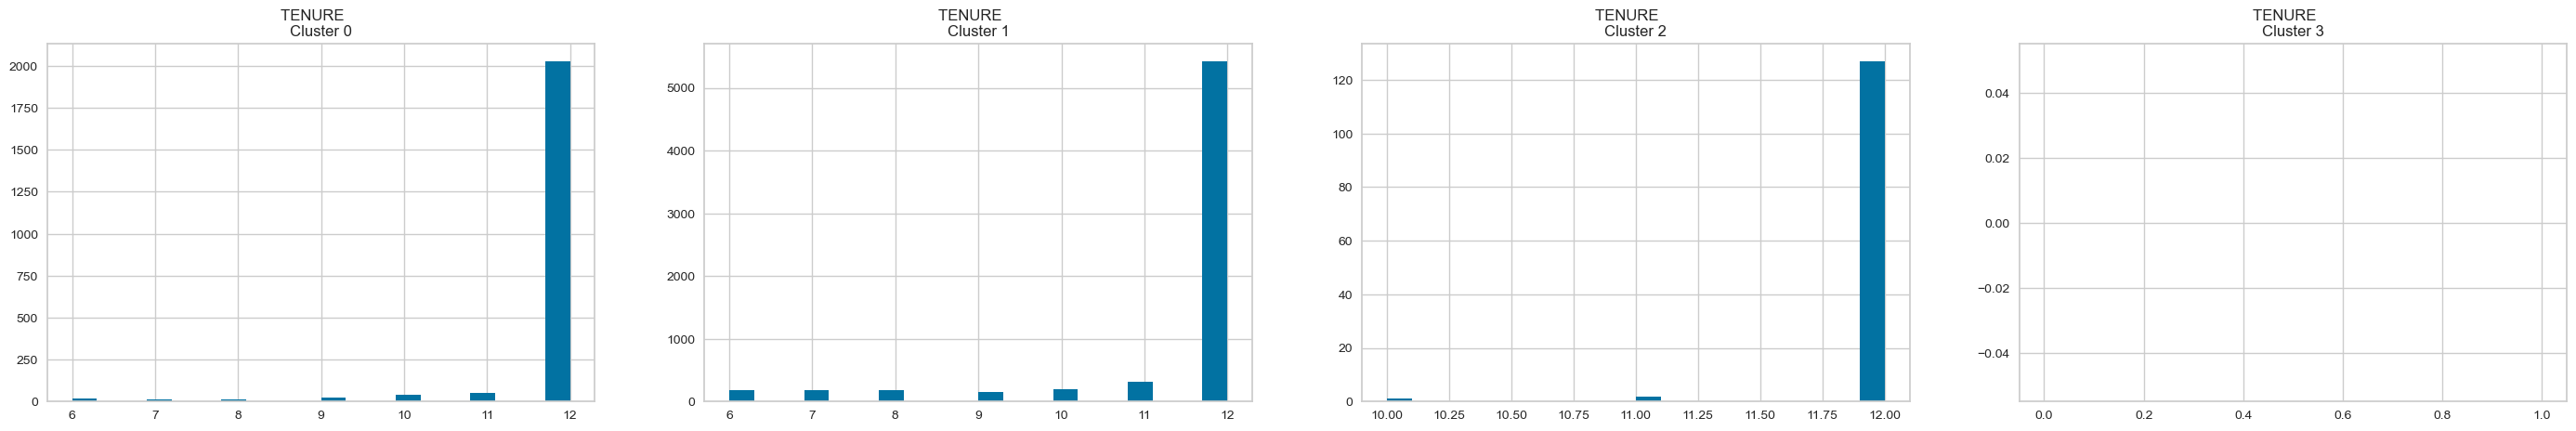

In [122]:
# Visualizamos histogramas para cada cluster 
for i in data_num.columns:
    plt.figure(figsize=(35, 5))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = data_dr[data_dr['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

In [131]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pred)
print(silhouette_score(pred, y))

c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.44237158


c:\Users\wmr_w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

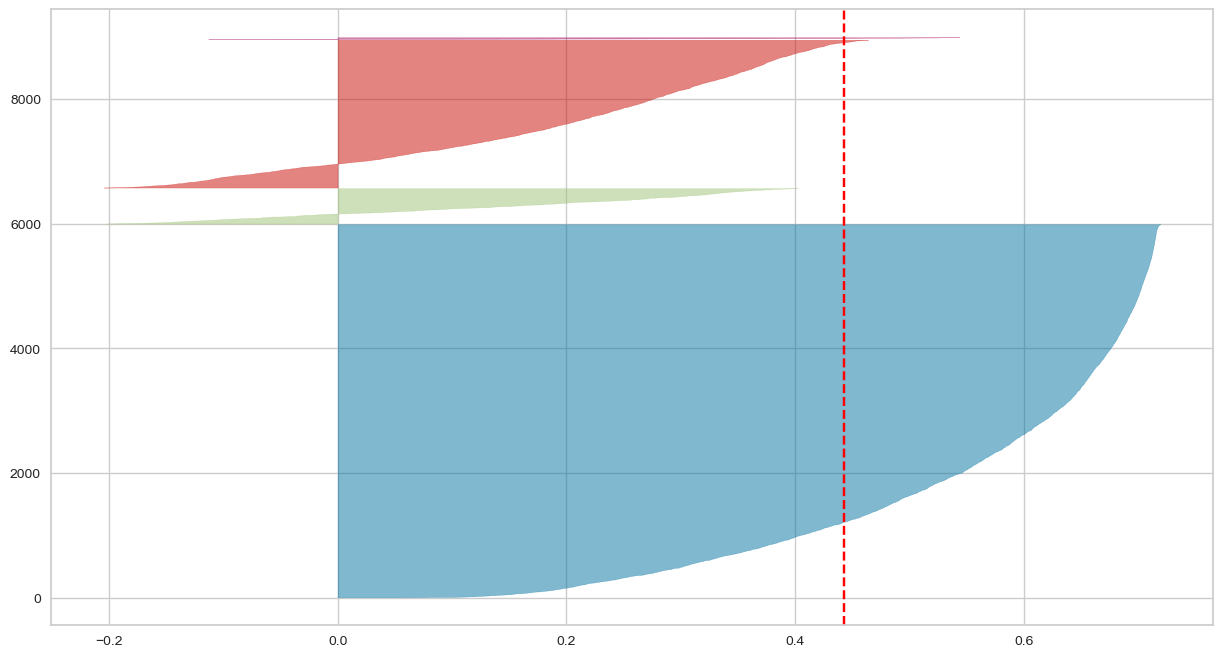

In [132]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pred)

## e. `PCA _ 2`

In [133]:
# Reduccion de a dos componentes de las 10 dimensiones
pca_2 = PCA(n_components=2)
princ_comp_autoe = pca_2.fit_transform(pred)
pca_df_autoe = pd.DataFrame(data = princ_comp_autoe, columns=["pca1", "pca2"])
pca_df_autoe.head()

pca1      pca2
0 -1.674687 -0.295464
1  0.242994  0.033459
2  1.727528 -0.153404
3 -0.032403 -0.986608
4 -1.851833 -0.051822

In [134]:
# concatenar con los nuevos labels
pca_df_autoe = pd.concat([pca_df_autoe, pd.DataFrame({"cluster":labels_2})], axis = 1)
pca_df_autoe

pca1      pca2  cluster
0    -1.674687 -0.295464        0
1     0.242994  0.033459        0
2     1.727528 -0.153404        1
3    -0.032403 -0.986608        0
4    -1.851833 -0.051822        0
...        ...       ...      ...
8945 -0.515804 -1.036447        0
8946 -1.337919 -0.838543        0
8947 -1.070819 -1.080287        0
8948 -2.452083 -0.408792        0
8949 -2.268854 -0.445049        0

[8950 rows x 3 columns]

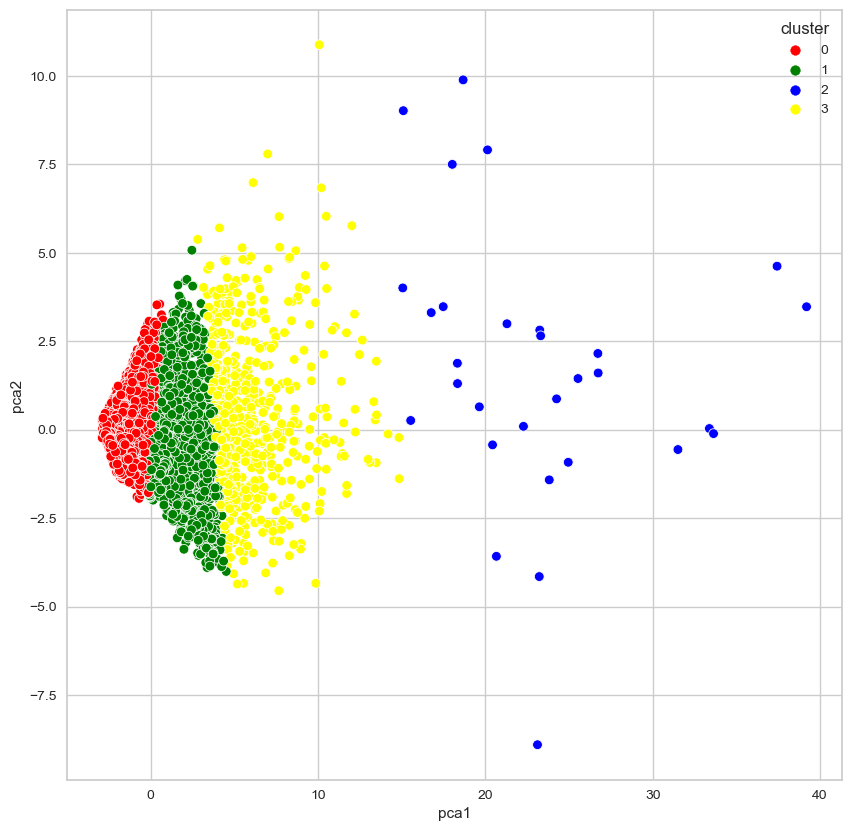

In [135]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df_autoe, palette=["red", "green", "blue", "yellow"])
plt.show()

# `DESCRIPCIÓN DE LOS CENTROIDES`

In [144]:
data_dr[data_dr['cluster']==0]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
3        0.000000        312.343947          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
5     1400.057770       2407.246035          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        0  
89

In [150]:
pca_df_autoe[pca_df_autoe.cluster == 0][['pca1', 'pca2']]

pca1      pca2
0    -1.674687 -0.295464
1     0.242994  0.033459
3    -0.032403 -0.986608
4    -1.851833 -0.051822
5    -1.194743  0.402810
...        ...       ...
8945 -0.515804 -1.036447
8946 -1.337919 -0.838543
8947 -1.070819 -1.080287
8948 -2.452083 -0.408792
8949 -2.268854 -0.445049

[5985 rows x 2 columns]

In [156]:
from scipy.spatial.distance import euclidean

In [172]:
for i in pca_df_autoe.cluster.unique():
# Datos de ejemplo (coordenadas x e y)
    data = pca_df_autoe[pca_df_autoe.cluster == i][['pca1', 'pca2']]
    data = data.to_numpy()

    # Calcular el centroide
    centroid = np.mean(data, axis=0)

    # Encontrar el dato más cercano al centroide
    closest_point = min(data, key=lambda x: euclidean(x, centroid))

    print("Dato más cercano al centroide: "+str(i), closest_point)
    print(pca_df_autoe[pca_df_autoe.pca1 == closest_point[0]],'\n')

Dato más cercano al centroide: 0 [-1.3159089   0.09666578]
          pca1      pca2  cluster
6902 -1.315909  0.096666        0 

Dato más cercano al centroide: 1 [ 1.5639242 -0.3455406]
         pca1      pca2  cluster
346  1.563924 -0.345541        1 

Dato más cercano al centroide: 3 [5.999903   0.45888224]
         pca1      pca2  cluster
712  5.999903  0.458882        3 

Dato más cercano al centroide: 2 [23.302378   2.6534615]
           pca1      pca2  cluster
5358  23.302378  2.653461        2 



In [181]:
cluster_autoencoder = pd.concat([data_dr[6902:6903],data_dr[346:347],data_dr[712:713],data_dr[5358:5359]],axis=0)
cluster_autoencoder

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6902   347.251558                1.0     210.80              0.00   
346   1897.672025                1.0     422.18            422.18   
712    446.735142                1.0    5228.36           2337.44   
5358  6372.182817                1.0   22101.78          22101.78   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6902                  210.80       0.00000             0.833333   
346                     0.00       0.00000             1.000000   
712                  2890.92       0.00000             1.000000   
5358                    0.00   19513.47483             0.333333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6902                    0.000000                          0.833333   
346                     1.000000                          0.000000   
712                     1.000000                          1.000000   
5358                    0.333333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6902                0.000000                 0             10        2500.0   
346                 0.000000                 0             12        5500.0   
712                 0.000000                 0             71        3000.0   
5358                0.666667                35             40        7500.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
6902    193.955840        183.609630          0.000000      12        0  
346    2961.632199        440.306340          0.000000      12        1  
712    4843.737867        177.051156          0.454545      12        3  
5358  39461.965800       6764.853481          0.250000      12        2

In [192]:
cluster_autoencoder_plot = cluster_autoencoder.set_index('cluster')
cluster_autoencoder_plot

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                
0         347.251558                1.0     210.80              0.00   
1        1897.672025                1.0     422.18            422.18   
3         446.735142                1.0    5228.36           2337.44   
2        6372.182817                1.0   22101.78          22101.78   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                        210.80       0.00000             0.833333   
1                          0.00       0.00000             1.000000   
3                       2890.92       0.00000             1.000000   
2                          0.00   19513.47483             0.333333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.000000                          0.833333   
1                          1.000000                          0.000000   
3                          1.000000                          1.000000   
2                          0.333333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.000000                 0             10   
1                      0.000000                 0             12   
3                      0.000000                 0             71   
2                      0.666667                35             40   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0              2500.0    193.955840        183.609630          0.000000   
1              5500.0   2961.632199        440.306340          0.000000   
3              3000.0   4843.737867        177.051156          0.454545   
2              7500.0  39461.965800       6764.853481          0.250000   

         TENURE  
cluster          
0            12  
1            12  
3            12  
2            12

In [202]:
cluster_autoencoder_plot.T

cluster                                     0            1            3  \
BALANCE                            347.251558  1897.672025   446.735142   
BALANCE_FREQUENCY                    1.000000     1.000000     1.000000   
PURCHASES                          210.800000   422.180000  5228.360000   
ONEOFF_PURCHASES                     0.000000   422.180000  2337.440000   
INSTALLMENTS_PURCHASES             210.800000     0.000000  2890.920000   
CASH_ADVANCE                         0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                  0.833333     1.000000     1.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     1.000000     1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.833333     0.000000     1.000000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                     0.000000     0.000000     0.000000   
PURCHASES_TRX                       10.000000    12.000000    71.000000   
CREDIT_LIMIT                      2500.000000  5500.000000  3000.000000   
PAYMENTS                           193.955840  2961.632199  4843.737867   
MINIMUM_PAYMENTS                   183.609630   440.306340   177.051156   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.454545   
TENURE                              12.000000    12.000000    12.000000   

cluster                                      2  
BALANCE                            6372.182817  
BALANCE_FREQUENCY                     1.000000  
PURCHASES                         22101.780000  
ONEOFF_PURCHASES                  22101.780000  
INSTALLMENTS_PURCHASES                0.000000  
CASH_ADVANCE                      19513.474830  
PURCHASES_FREQUENCY                   0.333333  
ONEOFF_PURCHASES_FREQUENCY            0.333333  
PURCHASES_INSTALLMENTS_FREQUENCY      0.000000  
CASH_ADVANCE_FREQUENCY                0.666667  
CASH_ADVANCE_TRX                     35.000000  
PURCHASES_TRX                        40.000000  
CREDIT_LIMIT                       7500.000000  
PAYMENTS                          39461.965800  
MINIMUM_PAYMENTS                   6764.853481  
PRC_FULL_PAYMENT                      0.250000  
TENURE                               12.000000

In [199]:
scaler = StandardScaler()
cluster_autoencoder_plot_S = scaler.fit_transform(cluster_autoencoder_plot)
cluster_autoencoder_plotT = pd.DataFrame(cluster_autoencoder_plot_S,columns=cluster_autoencoder_plot.columns)
cluster_autoencoder_plotT

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.783510                0.0  -0.757359         -0.674538   
1 -0.150392                0.0  -0.733747         -0.628720   
2 -0.742886                0.0  -0.196871         -0.420861   
3  1.676787                0.0   1.687977          1.724119   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.461146     -0.577350             0.152498   
1               -0.633311     -0.577350             0.762493   
2                1.727767     -0.577350             0.762493   
3               -0.633311      1.732051            -1.677484   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -1.347150                          0.811502   
1                    0.962251                         -0.991837   
2                    0.962251                          1.172171   
3                   -0.577351                         -0.991837   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.577350         -0.577350      -0.937007     -1.056329   
1               -0.577350         -0.577350      -0.856404      0.434959   
2               -0.577350         -0.577350       1.521377     -0.807781   
3                1.732051          1.732051       0.272034      1.429150   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0 -0.728616         -0.606553         -0.925064     0.0  
1 -0.555837         -0.515385         -0.925064     0.0  
2 -0.438341         -0.608882          1.462198     0.0  
3  1.722794          1.730819          0.387931     0.0

In [200]:
cluster_autoencoder_plotT = cluster_autoencoder_plotT.T.reset_index()
cluster_autoencoder_plotT

index         0         1         2         3
0                            BALANCE -0.783510 -0.150392 -0.742886  1.676787
1                  BALANCE_FREQUENCY  0.000000  0.000000  0.000000  0.000000
2                          PURCHASES -0.757359 -0.733747 -0.196871  1.687977
3                   ONEOFF_PURCHASES -0.674538 -0.628720 -0.420861  1.724119
4             INSTALLMENTS_PURCHASES -0.461146 -0.633311  1.727767 -0.633311
5                       CASH_ADVANCE -0.577350 -0.577350 -0.577350  1.732051
6                PURCHASES_FREQUENCY  0.152498  0.762493  0.762493 -1.677484
7         ONEOFF_PURCHASES_FREQUENCY -1.347150  0.962251  0.962251 -0.577351
8   PURCHASES_INSTALLMENTS_FREQUENCY  0.811502 -0.991837  1.172171 -0.991837
9             CASH_ADVANCE_FREQUENCY -0.577350 -0.577350 -0.577350  1.732051
10                  CASH_ADVANCE_TRX -0.577350 -0.577350 -0.577350  1.732051
11                     PURCHASES_TRX -0.937007 -0.856404  1.521377  0.272034
12                      CREDIT_LIMIT -1.056329  0.434959 -0.807781  1.429150
13                          PAYMENTS -0.728616 -0.555837 -0.438341  1.722794
14                  MINIMUM_PAYMENTS -0.606553 -0.515385 -0.608882  1.730819
15                  PRC_FULL_PAYMENT -0.925064 -0.925064  1.462198  0.387931
16                            TENURE  0.000000  0.000000  0.000000  0.000000

In [201]:
for i in range(0,4):
    fig = px.line_polar(cluster_autoencoder_plotT, r = i, theta ='index', line_close = True
    , title = 'Cluster ' + str(i), template="plotly_dark")
    fig.update_traces(fill = 'toself')

    fig.show()

c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



c:\Users\wmr_w\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

